In [243]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize']=(20,20)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from scipy import stats

In [244]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,StackingRegressor

from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_squared_error

from sklearn.feature_selection import RFECV

In [245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Section A : Regression  
## Target Variable is approx_cost(for two people)

# Data Understanding

In [246]:
df_zomato = pd.read_csv('zomato.csv')
df_zomato.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [247]:
df_zomato.shape

(51717, 17)

In [248]:
# There are 51717 rows and 17 columns

In [249]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [250]:
df_zomato.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [251]:
df_zomato.isna().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [252]:
# column dish_liked has more than 50% of missing value
# # We are dropping the null values.

In [253]:
df_zomato.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [254]:
# Url seems to be insignificant column

In [255]:
df_zomato.sample(100)
# checking how data look by taking some sample

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
28172,https://www.zomato.com/bangalore/natural-ice-c...,"1021, 80 Feet Main Road, Koramangala 1st Block...",Natural Ice Cream,No,No,4.5/5,940,080 25634466,Koramangala 1st Block,Dessert Parlor,"Coffee Walnut, Chocolate Icecreams, Tender Coc...","Ice Cream, Beverages",200,"[('Rated 5.0', ""RATED\n Wow wow wow wow????Ju...",[],Desserts,Koramangala 4th Block
11898,https://www.zomato.com/bangalore/the-belgian-w...,"Shop GF-02, Ground Floor, Smart Avenue, 28, Re...",The Belgian Waffle Co.,Yes,No,3.7/5,73,+91 9820433755,Residency Road,Dessert Parlor,Waffles,"Desserts, Beverages",350,"[('Rated 1.0', 'RATED\n Ordered three waffles...",[],Delivery,Church Street
26853,https://www.zomato.com/bangalore/punjabi-by-na...,"6, Krishna Nagar Industrial Area, Behind Forum...",Punjabi by Nature 2.0,No,No,4.2/5,3236,NaN,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATED\n It has a beautiful am...",[],Delivery,Koramangala 4th Block
40660,https://www.zomato.com/bangalore/hyderabadi-bi...,"94, Narayanaswamy Building, Panathur Railway S...",Hyderabadi Biryani Hub,Yes,No,3.2 /5,24,+91 9739375525,Bellandur,Casual Dining,NaN,"Biryani, North Indian, Chinese",600,"[('Rated 1.0', 'RATED\n I ordered a mutton gr...","['Chicken Dum Biryani', 'Chicken Fry Piece Bir...",Delivery,Marathahalli
22221,https://www.zomato.com/bangalore/street-foods-...,"Shop 10, 3rd Floor, Food Court, Royal Meenaksh...",Street Foods by Punjab Grill,Yes,No,3.6/5,19,+91 9871403894,Bannerghatta Road,Food Court,NaN,"Street Food, North Indian, Beverages",800,"[('Rated 3.0', ""RATED\n This outlet is opened...","['Tandoori Soya Chaap', 'Tandoori Chicken', 'T...",Delivery,JP Nagar
34201,https://www.zomato.com/bangalore/leon-grill-ko...,"123, KHB 1st Cross Road, Koramangala 5th Block...",Leon Grill,Yes,No,4.3 /5,172,080 41201051,Koramangala 5th Block,Quick Bites,"Burgers, Peri Peri Chicken, Spicy Chicken, Gri...","Burger, Fast Food",500,"[('Rated 4.0', 'RATED\n Perfectly prepared br...","['The Full Monty Breakfast', 'All American Bre...",Dine-out,Koramangala 6th Block
1245,https://www.zomato.com/bangalore/tempteys-btm?...,"26, 7th Main, 15th Cross, Mico Layout, 2nd Sta...",Tempteys,Yes,No,4.2/5,248,+91 7349760223\r\r\n+91 9611856377,BTM,"Dessert Parlor, Beverage Shop","Thick Shakes, Oreo Milkshake, Gelato, Oreo Sha...",Beverages,500,"[('Rated 1.0', 'RATED\n I had been to this pl...","['Awesome Oreo Shake', 'Mango Moon Shake', 'Ch...",Delivery,Bannerghatta Road
26210,https://www.zomato.com/bangalore/adukkala-rest...,"52, 2nd Cross, Horamavu Main Road, Banaswadi, ...",Adukkala Restaurant,Yes,No,2.9 /5,128,+91 8971735713\n080 48669946,Banaswadi,Casual Dining,"Tea, Shawarma, Egg Roast, Biryani, Appam",Kerala,600,"[('Rated 3.0', 'RATED\n This is a good place ...",[],Dine-out,Kammanahalli
10331,https://www.zomato.com/bangalore/dhaba-express...,"7, 1st Floor, HSR Layout, Sector 7, Bangalore",Dhaba Express,Yes,No,3.7 /5,176,+91 8867456453,HSR,"Takeaway, Delivery",Paratha,"Biryani, Fast Food, North Indian, Chinese",400,"[('Rated 1.0', 'RATED\n very very poor food q...",[],Desserts,BTM
8415,https://www.zomato.com/bangalore/shiv-shakthi-...,"#E 117/4, 22nd cross road, 3rd sector, hsr lay...",Shiv Shakthi,Yes,No,4.0/5,175,+91 9008427624,HSR,Quick Bites,"Poha, Samosa, Jalebi, Kachori","Street Food, North Indian",100,"[('Rated 4.0', 'RATED\n After along time ..th...",[],Delivery,BTM


# Data Cleaning

In [256]:
df_zomato[df_zomato.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [257]:
# There are no duplicated rows present

In [258]:
# df_zomato.drop_duplicates(keep='first',inplace=True)

In [259]:
df_zomato[df_zomato.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [260]:
df_zomato = df_zomato.drop(['url','dish_liked','menu_item','address','phone'],axis=1)
df_zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [261]:
# We can see that see that url has all unique value
# dish_liked has more than 50 % of null values present in the columns
# menu item column also contains empty lists 
# We can drop these column as these column is not significant and doesn't make much impact on our analysis.

In [262]:
df_zomato.dropna(inplace=True)
df_zomato.shape

(43533, 12)

In [263]:
df_zomato.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [264]:
df_zomato_num = df_zomato.select_dtypes(include=np.number)

In [265]:
df_zomato_cat = df_zomato.select_dtypes(exclude=np.number)
df_zomato_cat.head(1)

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


# Feature Engineering

In [266]:
df_zomato_cat['rate'] = df_zomato_cat['rate'].apply(lambda x:x.split('/')[0])
#df_zomato_cat['rate'].replace({"NEW":"0.0"},inplace=True)
#df_zomato_cat['rate'].replace({"-":"0.0"},inplace=True)
df_zomato_cat = df_zomato_cat[~(df_zomato_cat['rate'].isin(["-","NEW"]))]
df_zomato_cat['rate'] = df_zomato_cat['rate'].astype(np.number)

In [267]:
df_zomato_cat.nunique()

name                            6602
online_order                       2
book_table                         2
rate                              31
location                          92
rest_type                         87
cuisines                        2367
approx_cost(for two people)       63
reviews_list                   21103
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [268]:
df_zomato_cat['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [269]:
df_zomato_cat.drop(['reviews_list','name'],axis=1,inplace=True)

In [270]:
df_zomato_cat['approx_cost(for two people)'] = df_zomato_cat['approx_cost(for two people)'].apply(lambda x:x.replace(',','')).astype(np.number)

In [271]:
df_zomato_cat.nunique()

online_order                      2
book_table                        2
rate                             31
location                         92
rest_type                        87
cuisines                       2367
approx_cost(for two people)      63
listed_in(type)                   7
listed_in(city)                  30
dtype: int64

In [272]:
# Creating final data set for analysis

In [273]:
df_zomato_new = pd.concat([df_zomato_num,df_zomato_cat],axis=1)
df_zomato_new.head()

,votes,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,775,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,787,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,918,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,88,No,No,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,166,No,No,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [274]:
df_zomato_new.shape

(43533, 10)

In [275]:
df_zomato_new.isna().sum()

votes                             0
online_order                   2270
book_table                     2270
rate                           2270
location                       2270
rest_type                      2270
cuisines                       2270
approx_cost(for two people)    2270
listed_in(type)                2270
listed_in(city)                2270
dtype: int64

In [276]:
df_zomato_new.dropna(inplace=True)

In [277]:
df_zomato_new.isna().sum()

votes                          0
online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [278]:
df_zomato_new['rest_type'].value_counts()

Quick Bites                      13885
Casual Dining                     9614
Cafe                              3369
Dessert Parlor                    1850
Delivery                          1667
Takeaway, Delivery                1279
Casual Dining, Bar                1092
Bakery                             704
Beverage Shop                      640
Bar                                640
Food Court                         498
Bar, Casual Dining                 385
Lounge                             381
Pub                                352
Sweet Shop                         346
Fine Dining                        343
Casual Dining, Cafe                310
Beverage Shop, Quick Bites         239
Pub, Casual Dining                 236
Bakery, Quick Bites                225
Mess                               180
Cafe, Casual Dining                173
Sweet Shop, Quick Bites            171
Kiosk                              152
Cafe, Bakery                       146
Cafe, Dessert Parlor     

#### Spliting the Numerical column and Categorical Columns

In [279]:
df_zomato_num_new = df_zomato_new.select_dtypes(include=np.number)
df_zomato_cat_new = df_zomato_new.select_dtypes(include=np.object_)

# Visualization

### Numerical columns

In [280]:
col_list = df_zomato_num_new.columns.to_list()

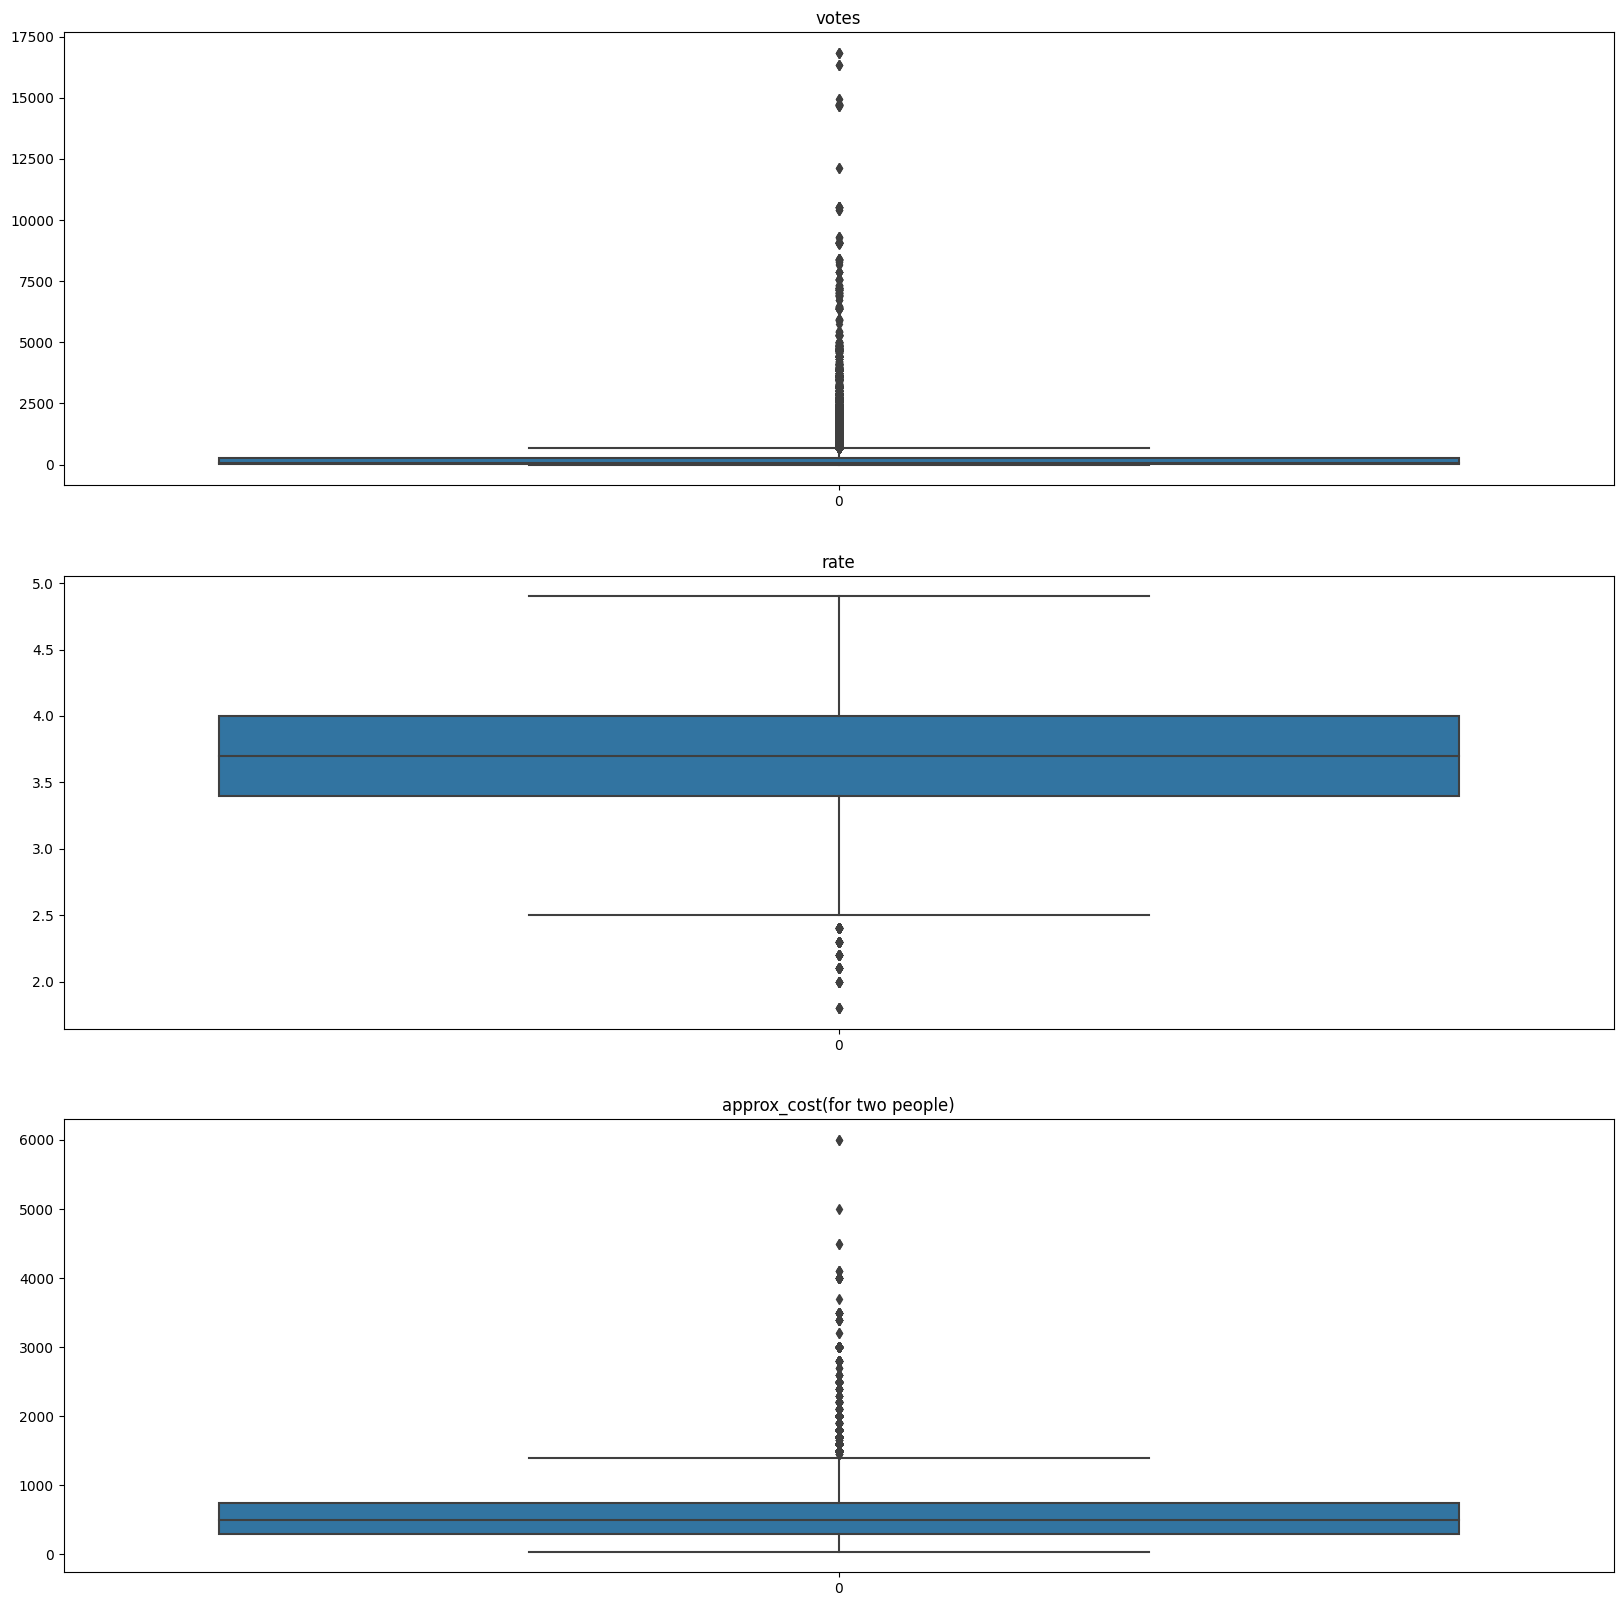

In [281]:
fig,ax= plt.subplots(nrows=3,ncols=1,figsize=(20,20))
j=0
for var,subplot in zip(df_zomato_num_new.columns,ax.flatten()):
    sns.boxplot(data=df_zomato_num_new[var],ax=subplot)
    subplot.set_title(col_list[j])
    j+=1
plt.show()

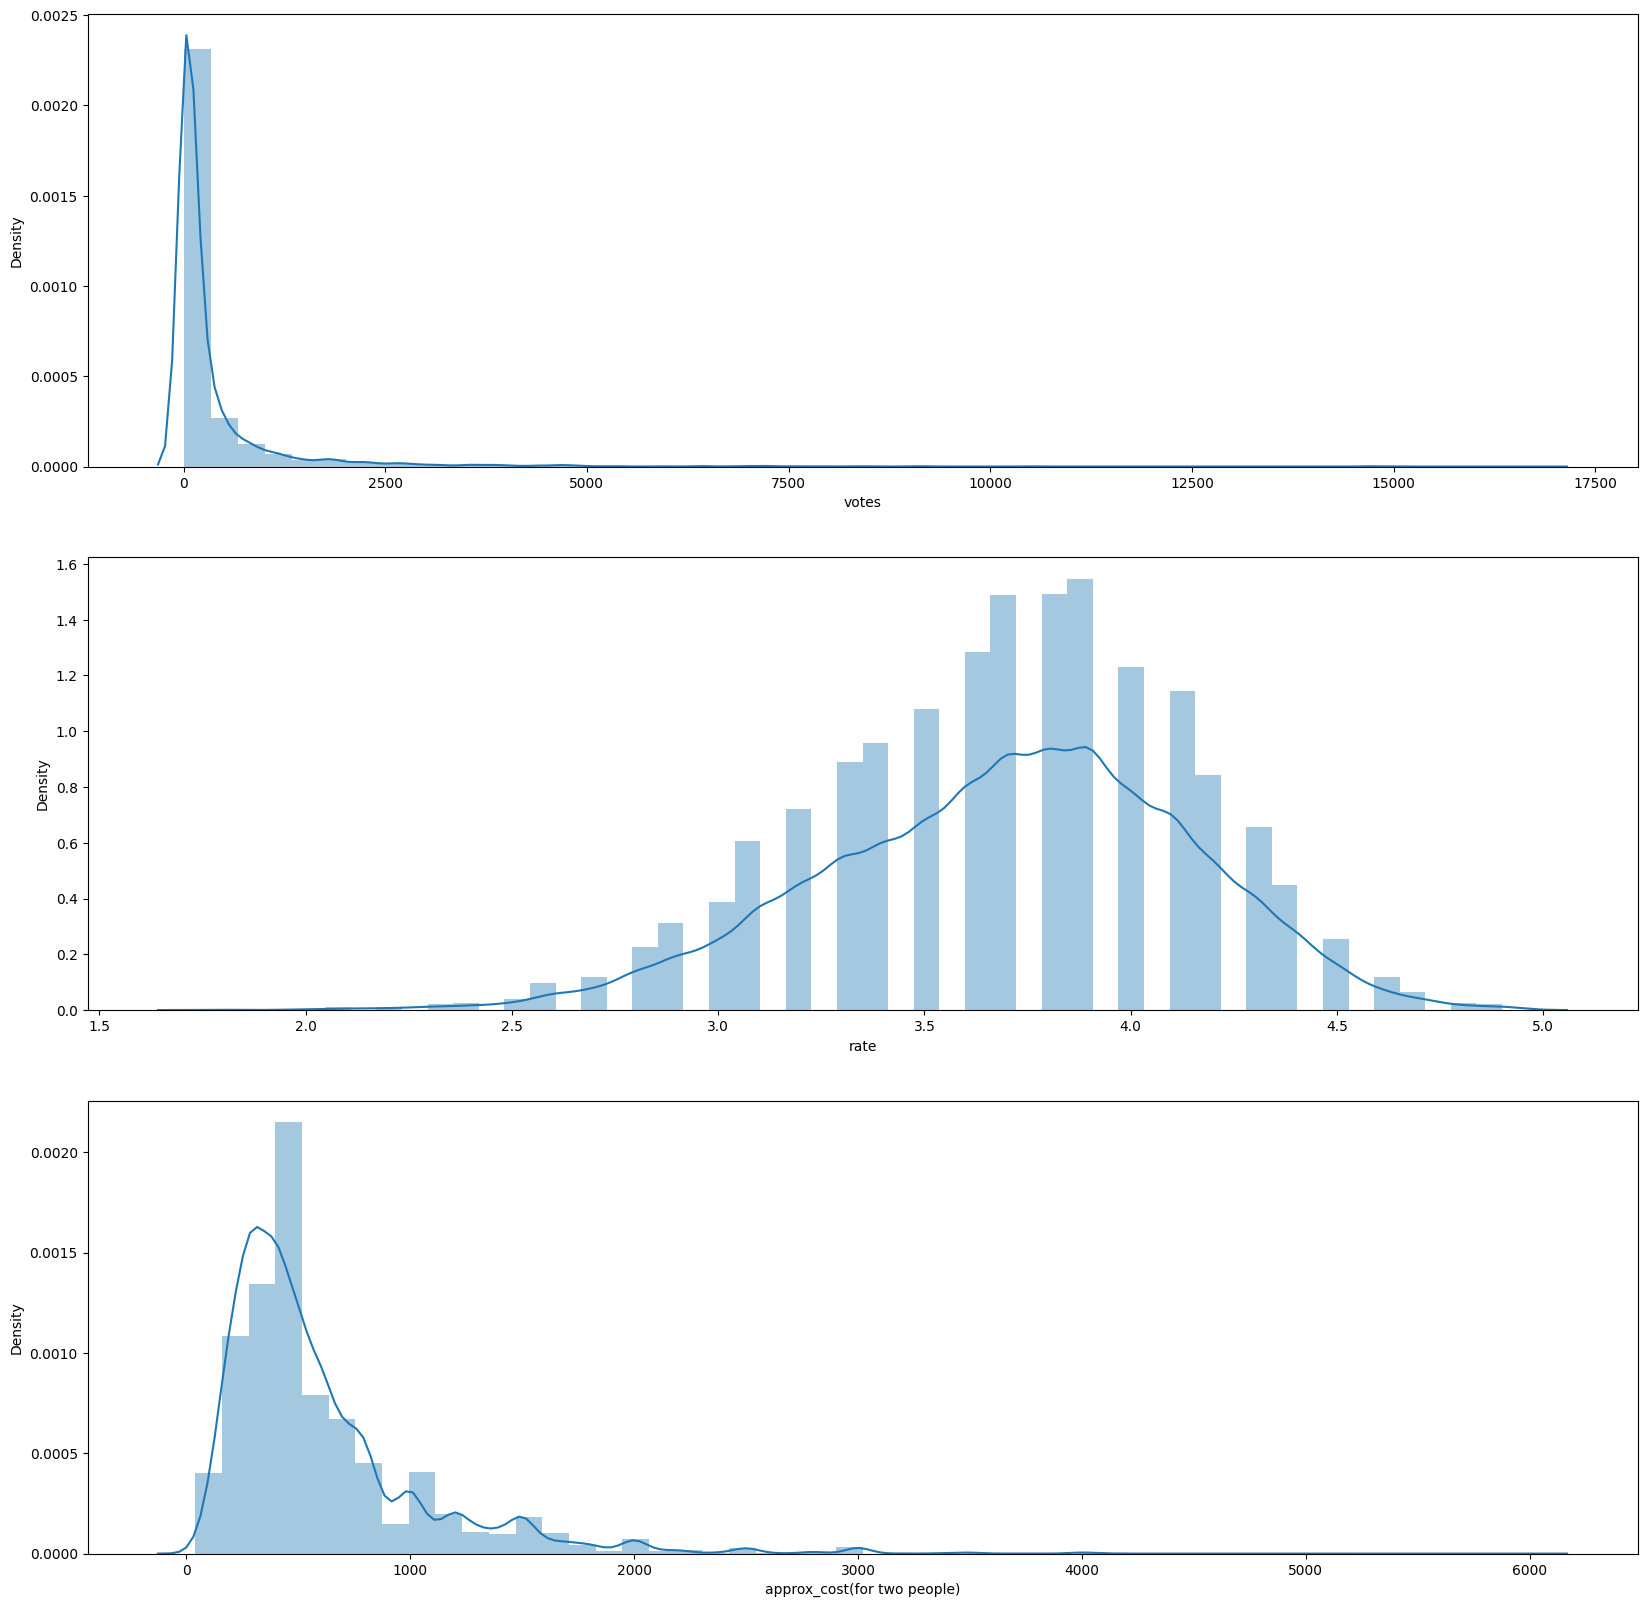

In [282]:
fig,ax= plt.subplots(nrows=3,ncols=1)

for var,subplot in zip(df_zomato_num_new.columns,ax.flatten()):
    sns.distplot(a=df_zomato_num_new[var],ax=subplot)
plt.show()

In [283]:
# We can see the there are some outliers are present in all the three columns

### For Categorical column

In [284]:
col = df_zomato_cat_new.drop(['cuisines'],axis=1).columns.to_list()
col

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

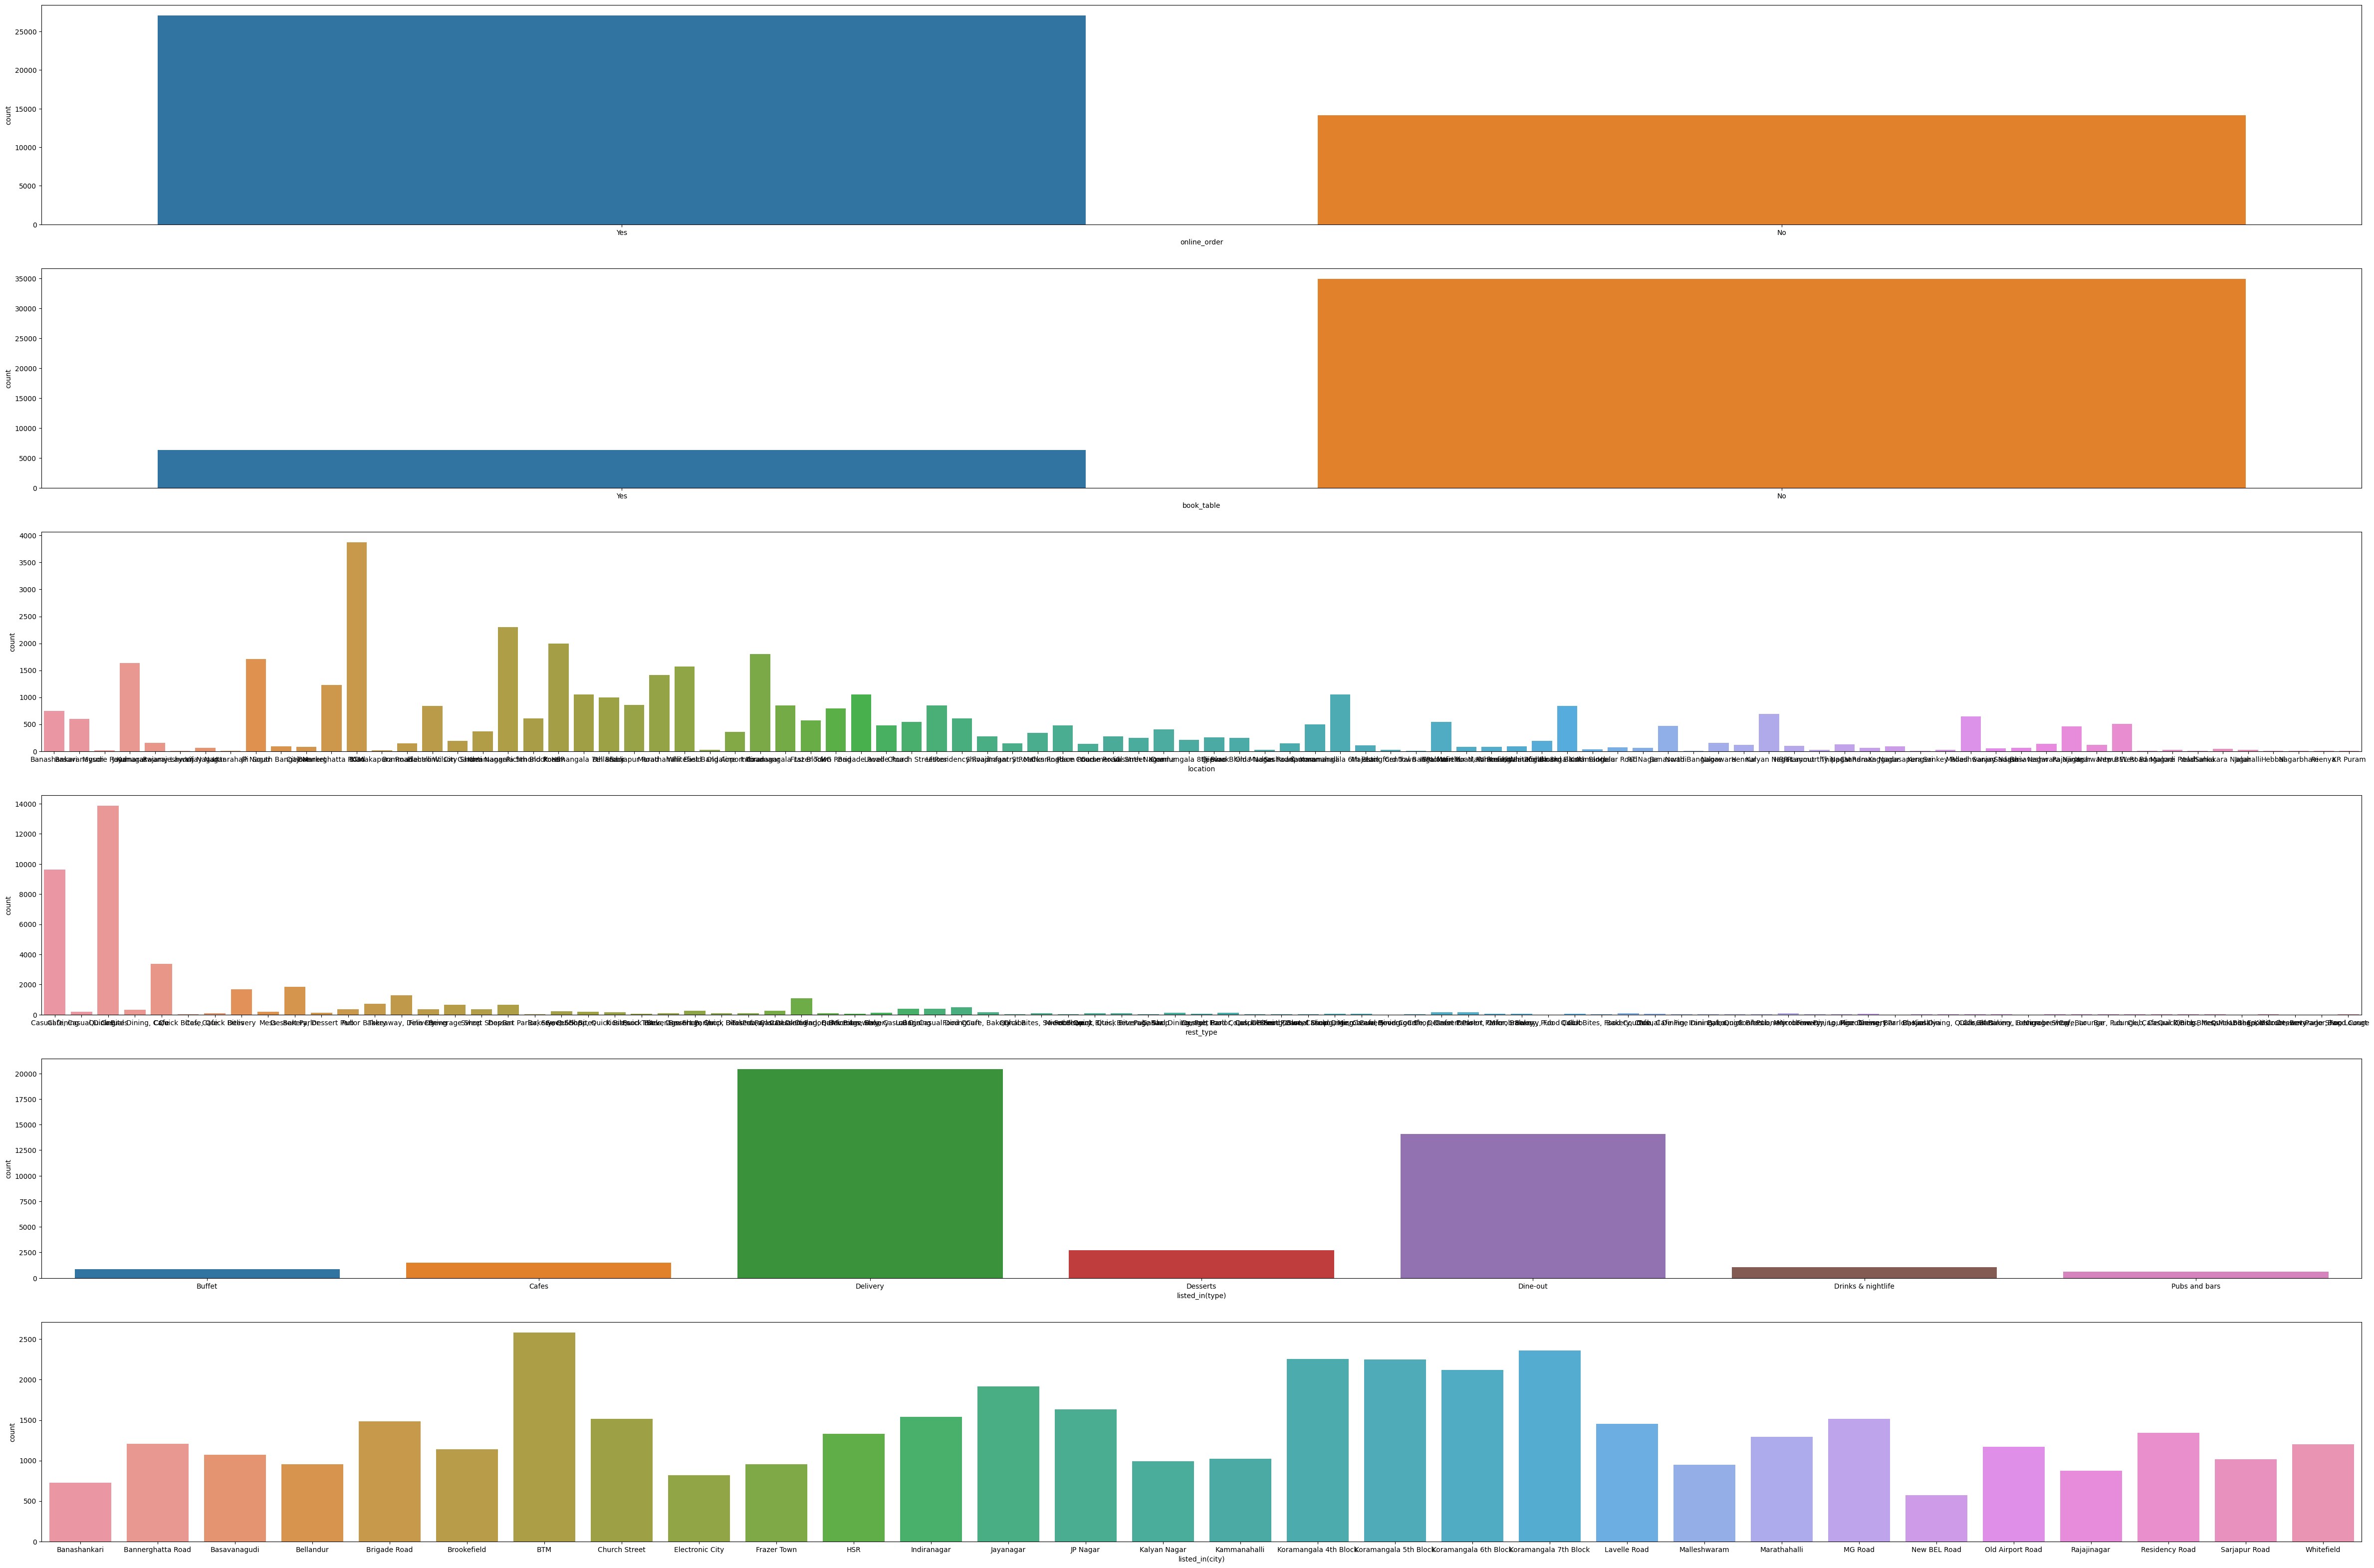

In [285]:
fig,ax= plt.subplots(nrows=6,ncols=1,figsize=(60,40))
col = df_zomato_cat_new.drop(['cuisines'],axis=1).columns.to_list()
for var,subplot in zip(col,ax.flatten()):
    sns.countplot(x=df_zomato_cat_new[var],ax=subplot)
plt.show()

In [286]:
le = LabelEncoder()

for i in df_zomato_cat_new.columns:
    label = le.fit_transform(df_zomato_cat_new[i])
    df_zomato_cat_new[i] = label
df_zomato_cat_new.head()

,online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
0,1,1,1,24,1894,0,1
1,1,0,1,24,816,0,1
2,1,0,1,19,653,0,1
3,0,0,1,73,2221,0,1
4,0,0,4,24,1921,0,1


In [287]:
df_zomato_new2 = pd.concat([df_zomato_num_new,df_zomato_cat_new],axis=1)
df_zomato_new2.head()

,votes,rate,approx_cost(for two people),online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
0,775,4.1,800.0,1,1,1,24,1894,0,1
1,787,4.1,800.0,1,0,1,24,816,0,1
2,918,3.8,800.0,1,0,1,19,653,0,1
3,88,3.7,300.0,0,0,1,73,2221,0,1
4,166,3.8,600.0,0,0,4,24,1921,0,1


In [288]:
df_zomato_new2.skew()

votes                          6.869773
rate                          -0.327800
approx_cost(for two people)    2.431718
online_order                  -0.660596
book_table                     1.930317
location                       0.373894
rest_type                      0.059926
cuisines                      -0.077128
listed_in(type)                0.258301
listed_in(city)               -0.074184
dtype: float64

In [289]:
df_zomato_new2.describe()

,votes,rate,approx_cost(for two people),online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,352.683179,3.702011,603.914063,0.656811,0.152776,35.715096,45.289727,1208.839129,2.806946,14.254538
std,884.177761,0.439985,464.942973,0.474780,0.359776,26.406399,26.085202,670.720623,1.170420,8.277449
min,0.000000,1.800000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.400000,300.000000,0.000000,0.000000,12.000000,24.000000,590.000000,2.000000,7.000000
50%,73.000000,3.700000,500.000000,1.000000,0.000000,31.000000,37.000000,1255.000000,2.000000,15.000000
75%,277.000000,4.000000,750.000000,1.000000,0.000000,54.000000,73.000000,1700.000000,4.000000,20.000000
max,16832.000000,4.900000,6000.000000,1.000000,1.000000,91.000000,86.000000,2366.000000,6.000000,29.000000


# Outlier treatment

Q1 = df_zomato_new2.quantile(0.25)
Q3 = df_zomato_new2.quantile(0.75)

IQR = Q3-Q1

df_zomato_new2_IQR = df_zomato_new2[~((df_zomato_new2 > Q3+1.5*IQR)| (df_zomato_new2 < Q1-1.5*IQR)).any(axis=1)].reset_index(drop=True)
df_zomato_new2_IQR.shape

In [290]:
# We will using capping instead of IQR method to minimize the row deletion 

In [291]:
df_zomato_new2['votes'].describe()

count    41263.000000
mean       352.683179
std        884.177761
min          0.000000
25%         21.000000
50%         73.000000
75%        277.000000
max      16832.000000
Name: votes, dtype: float64

In [292]:
df_zomato_new2['votes'].quantile(0.95)

1706.0

In [293]:
df_zomato_new2[df_zomato_new2['votes'] <15000].describe()

,votes,rate,approx_cost(for two people),online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,41257.000000,41257.000000,41257.000000,41257.000000,41257.000000,41257.000000,41257.000000,41257.000000,41257.000000,41257.000000
mean,350.322006,3.701837,603.769203,0.656761,0.152653,35.709383,45.287151,1208.869356,2.806821,14.254284
std,862.283778,0.439780,464.821567,0.474796,0.359657,26.404069,26.086224,670.764710,1.170363,8.276759
min,0.000000,1.800000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.400000,300.000000,0.000000,0.000000,12.000000,24.000000,590.000000,2.000000,7.000000
50%,73.000000,3.700000,500.000000,1.000000,0.000000,31.000000,37.000000,1255.000000,2.000000,15.000000
75%,277.000000,4.000000,750.000000,1.000000,0.000000,54.000000,73.000000,1700.000000,4.000000,20.000000
max,14956.000000,4.900000,6000.000000,1.000000,1.000000,91.000000,86.000000,2366.000000,6.000000,29.000000


In [294]:
df_zomato_new2 = df_zomato_new2[df_zomato_new2['votes'] <1800]

In [295]:
df_zomato_new2['rate'].describe()

count    39390.000000
mean         3.671155
std          0.423163
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [296]:
df_zomato_new2 = df_zomato_new2[df_zomato_new2['votes'] <1500]

In [297]:
df_zomato_new2.skew()

votes                          2.330922
rate                          -0.413436
approx_cost(for two people)    2.808578
online_order                  -0.673631
book_table                     2.321539
location                       0.389684
rest_type                      0.010029
cuisines                      -0.085650
listed_in(type)                0.282065
listed_in(city)               -0.062535
dtype: float64

In [298]:
df_zomato_new2 = df_zomato_new2.reset_index(drop=True)

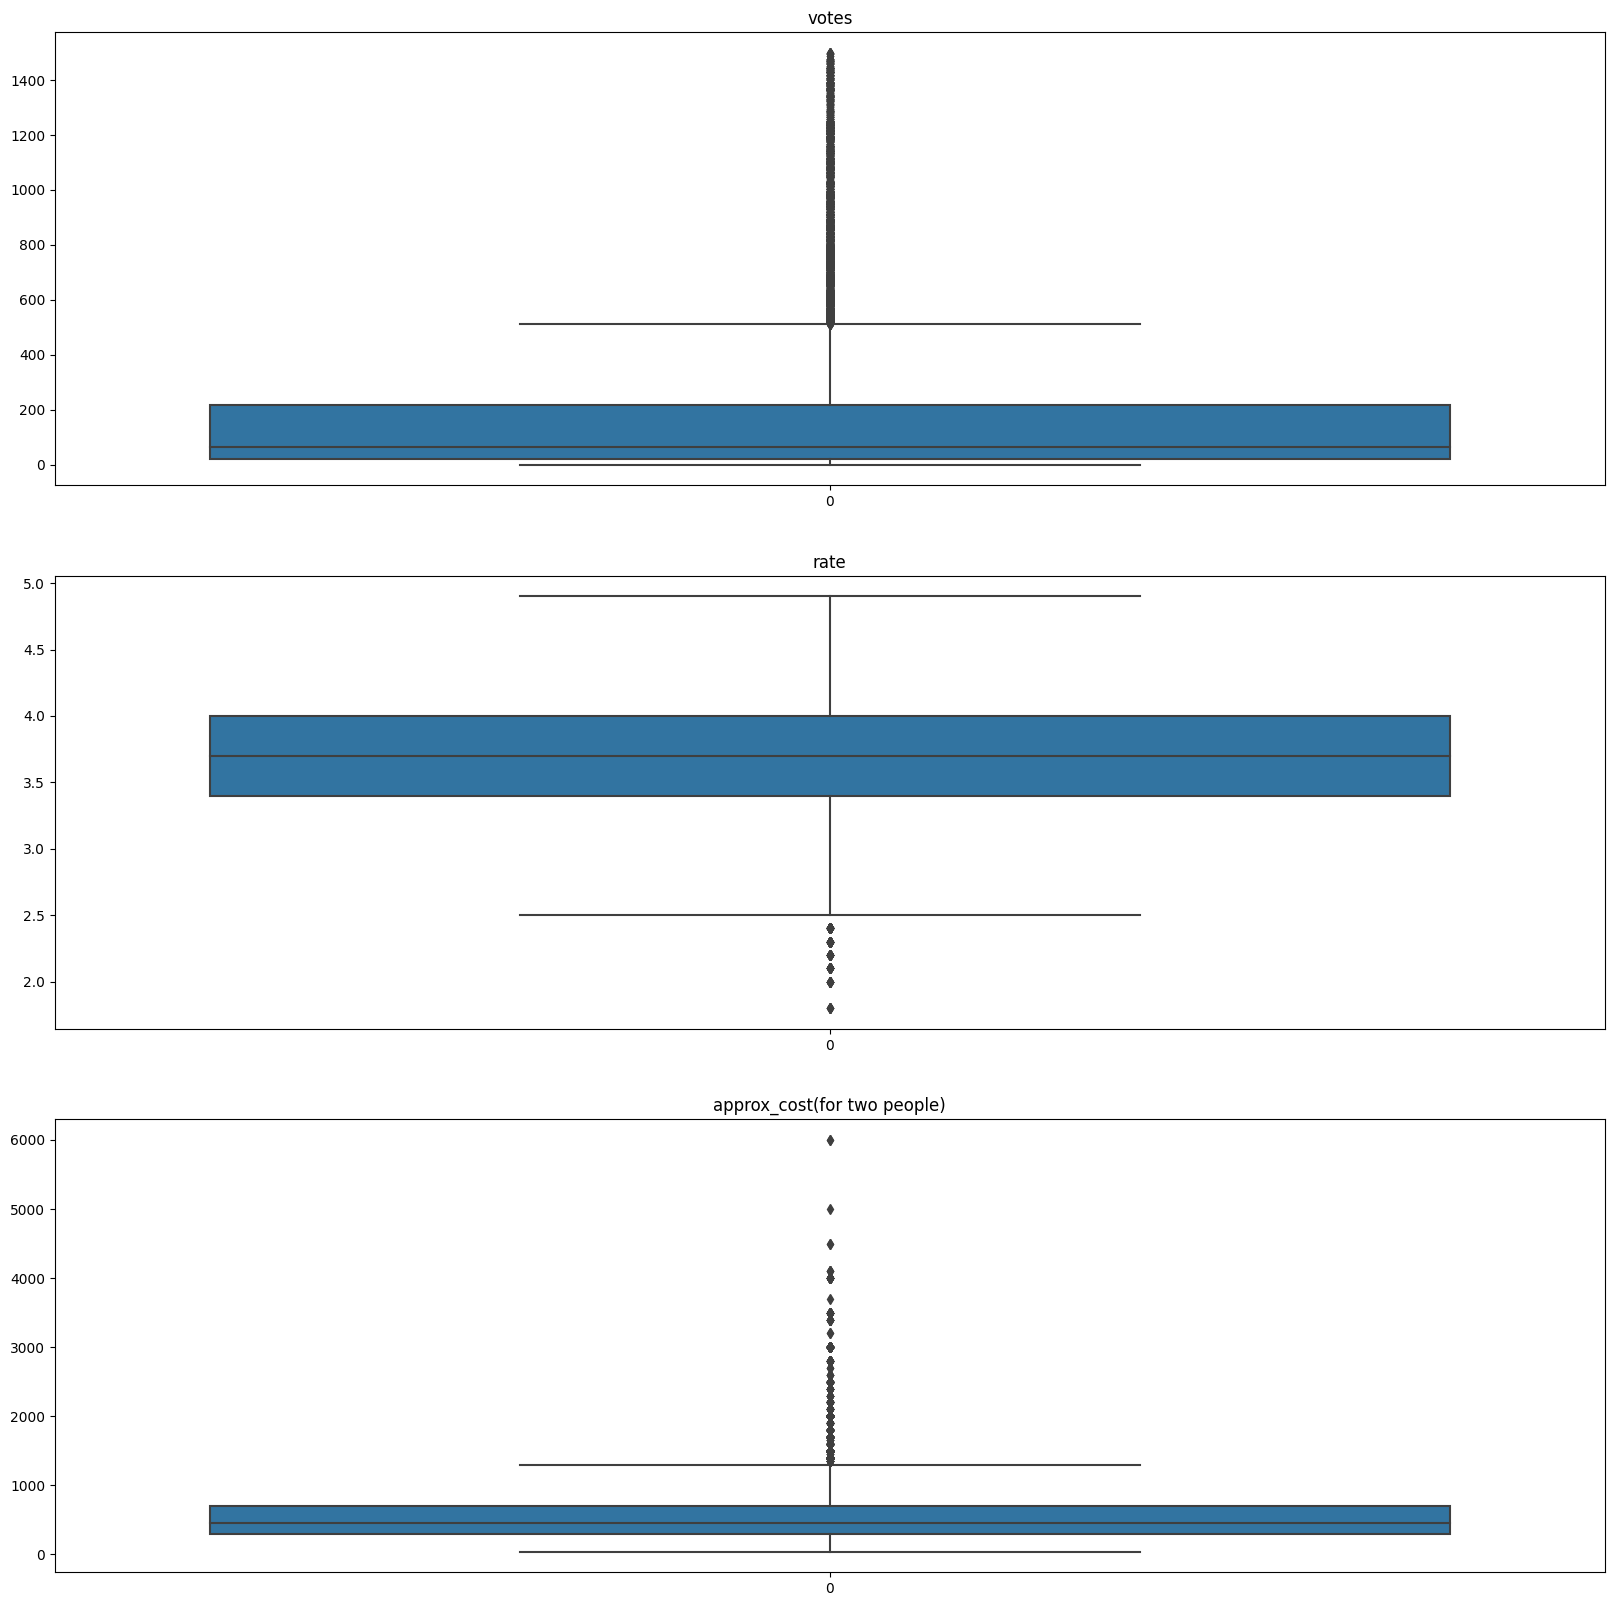

In [299]:
fig,ax= plt.subplots(nrows=3,ncols=1,figsize=(20,20))
j=0
for var,subplot in zip(df_zomato_new2.columns,ax.flatten()):
    sns.boxplot(data=df_zomato_new2[var],ax=subplot)
    subplot.set_title(col_list[j])
    j+=1
plt.show()

In [ ]:
# We reduce some outlier althought it is still there  

In [300]:
np.log(df_zomato_new2['approx_cost(for two people)']).skew()

0.24772938546481138

In [301]:
#df_zomato_new2_norm = np.sqrt(df_zomato_new2)

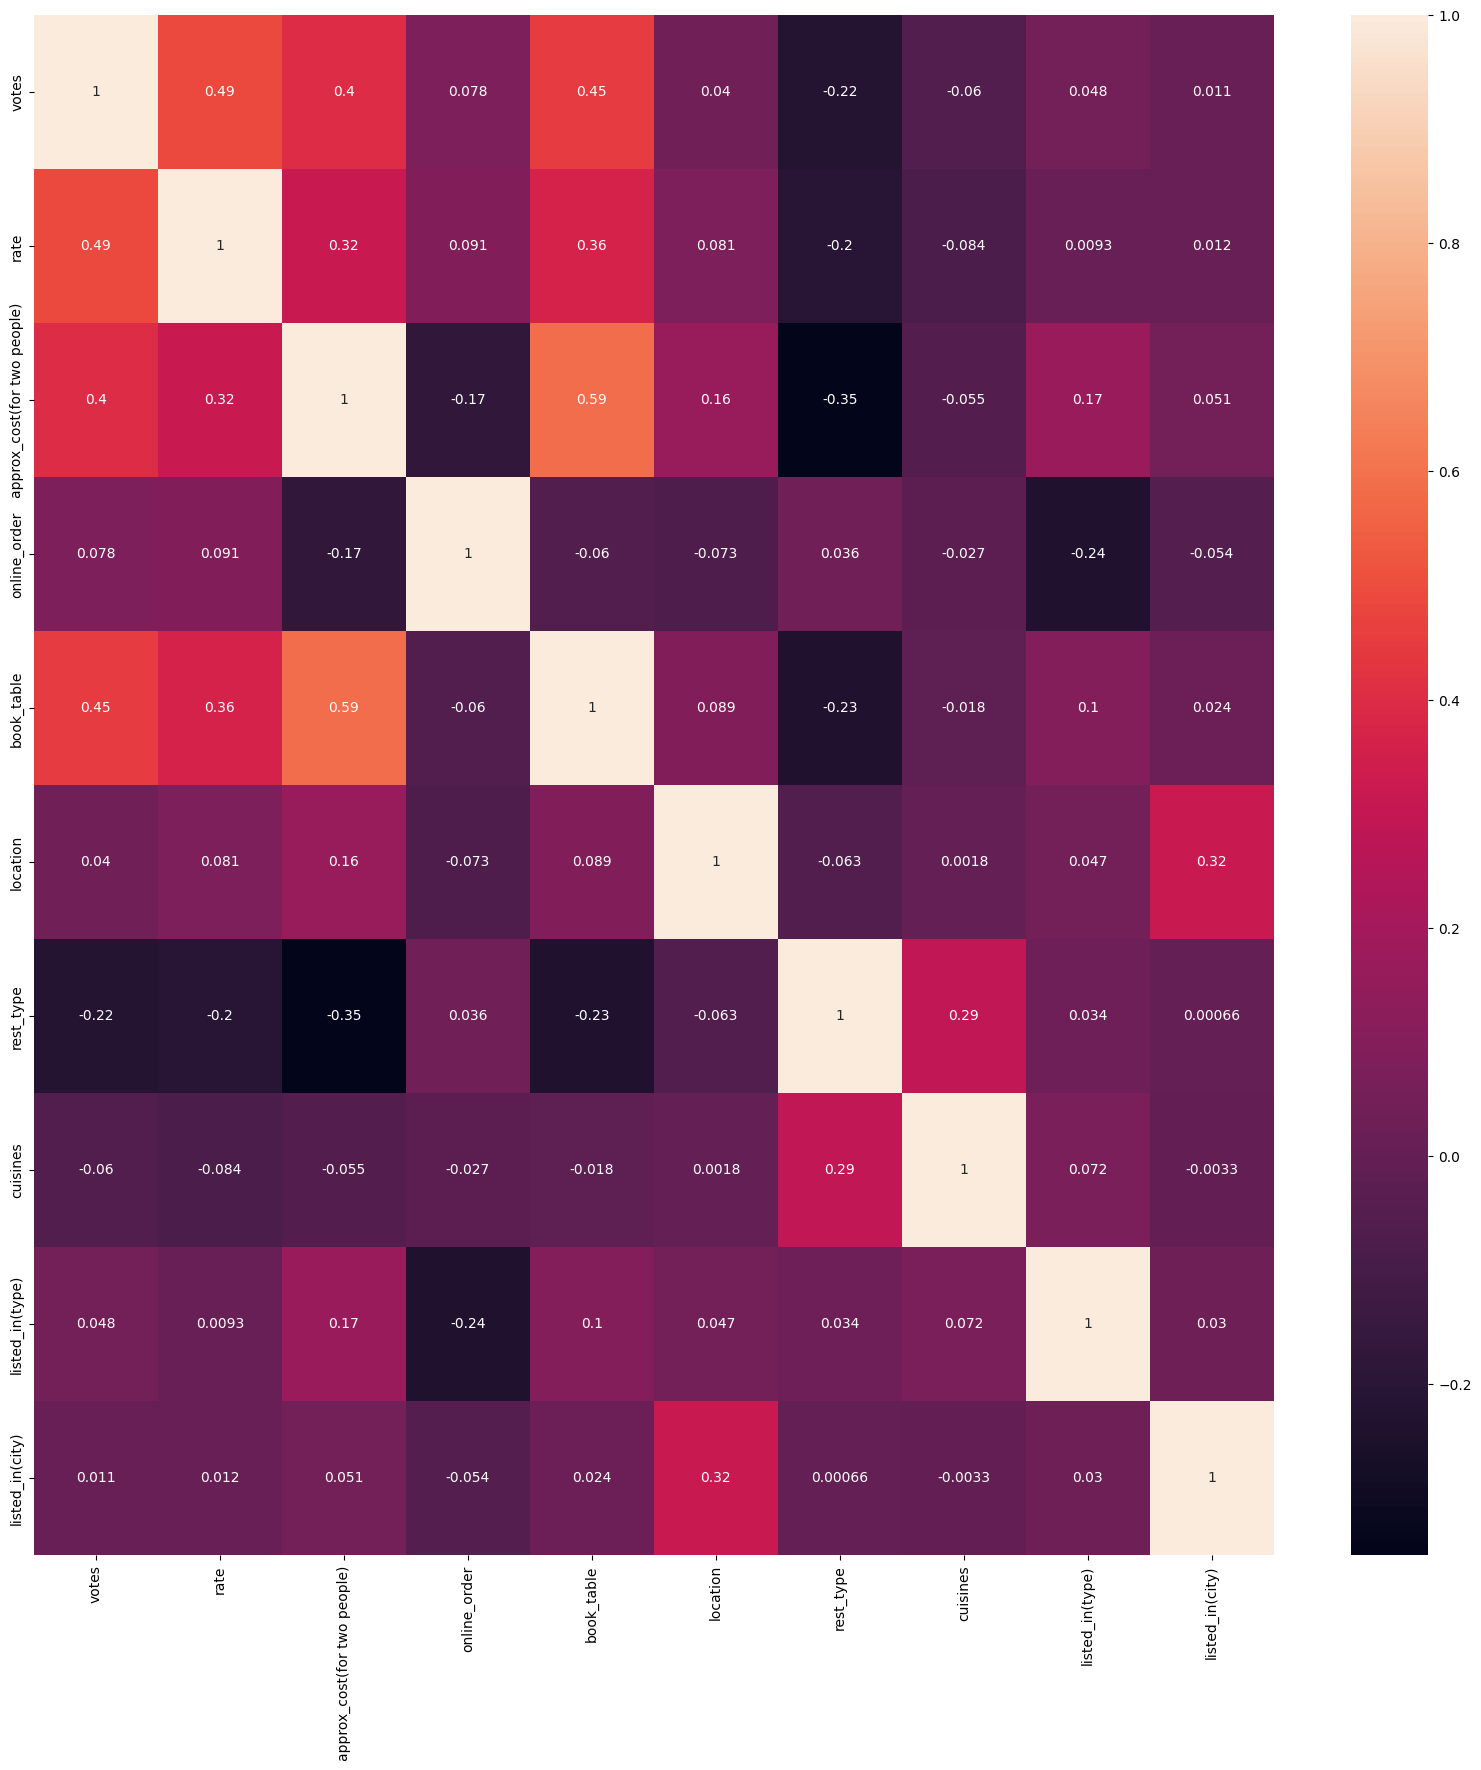

In [302]:
sns.heatmap(df_zomato_new2.corr(),annot=True)
plt.show()

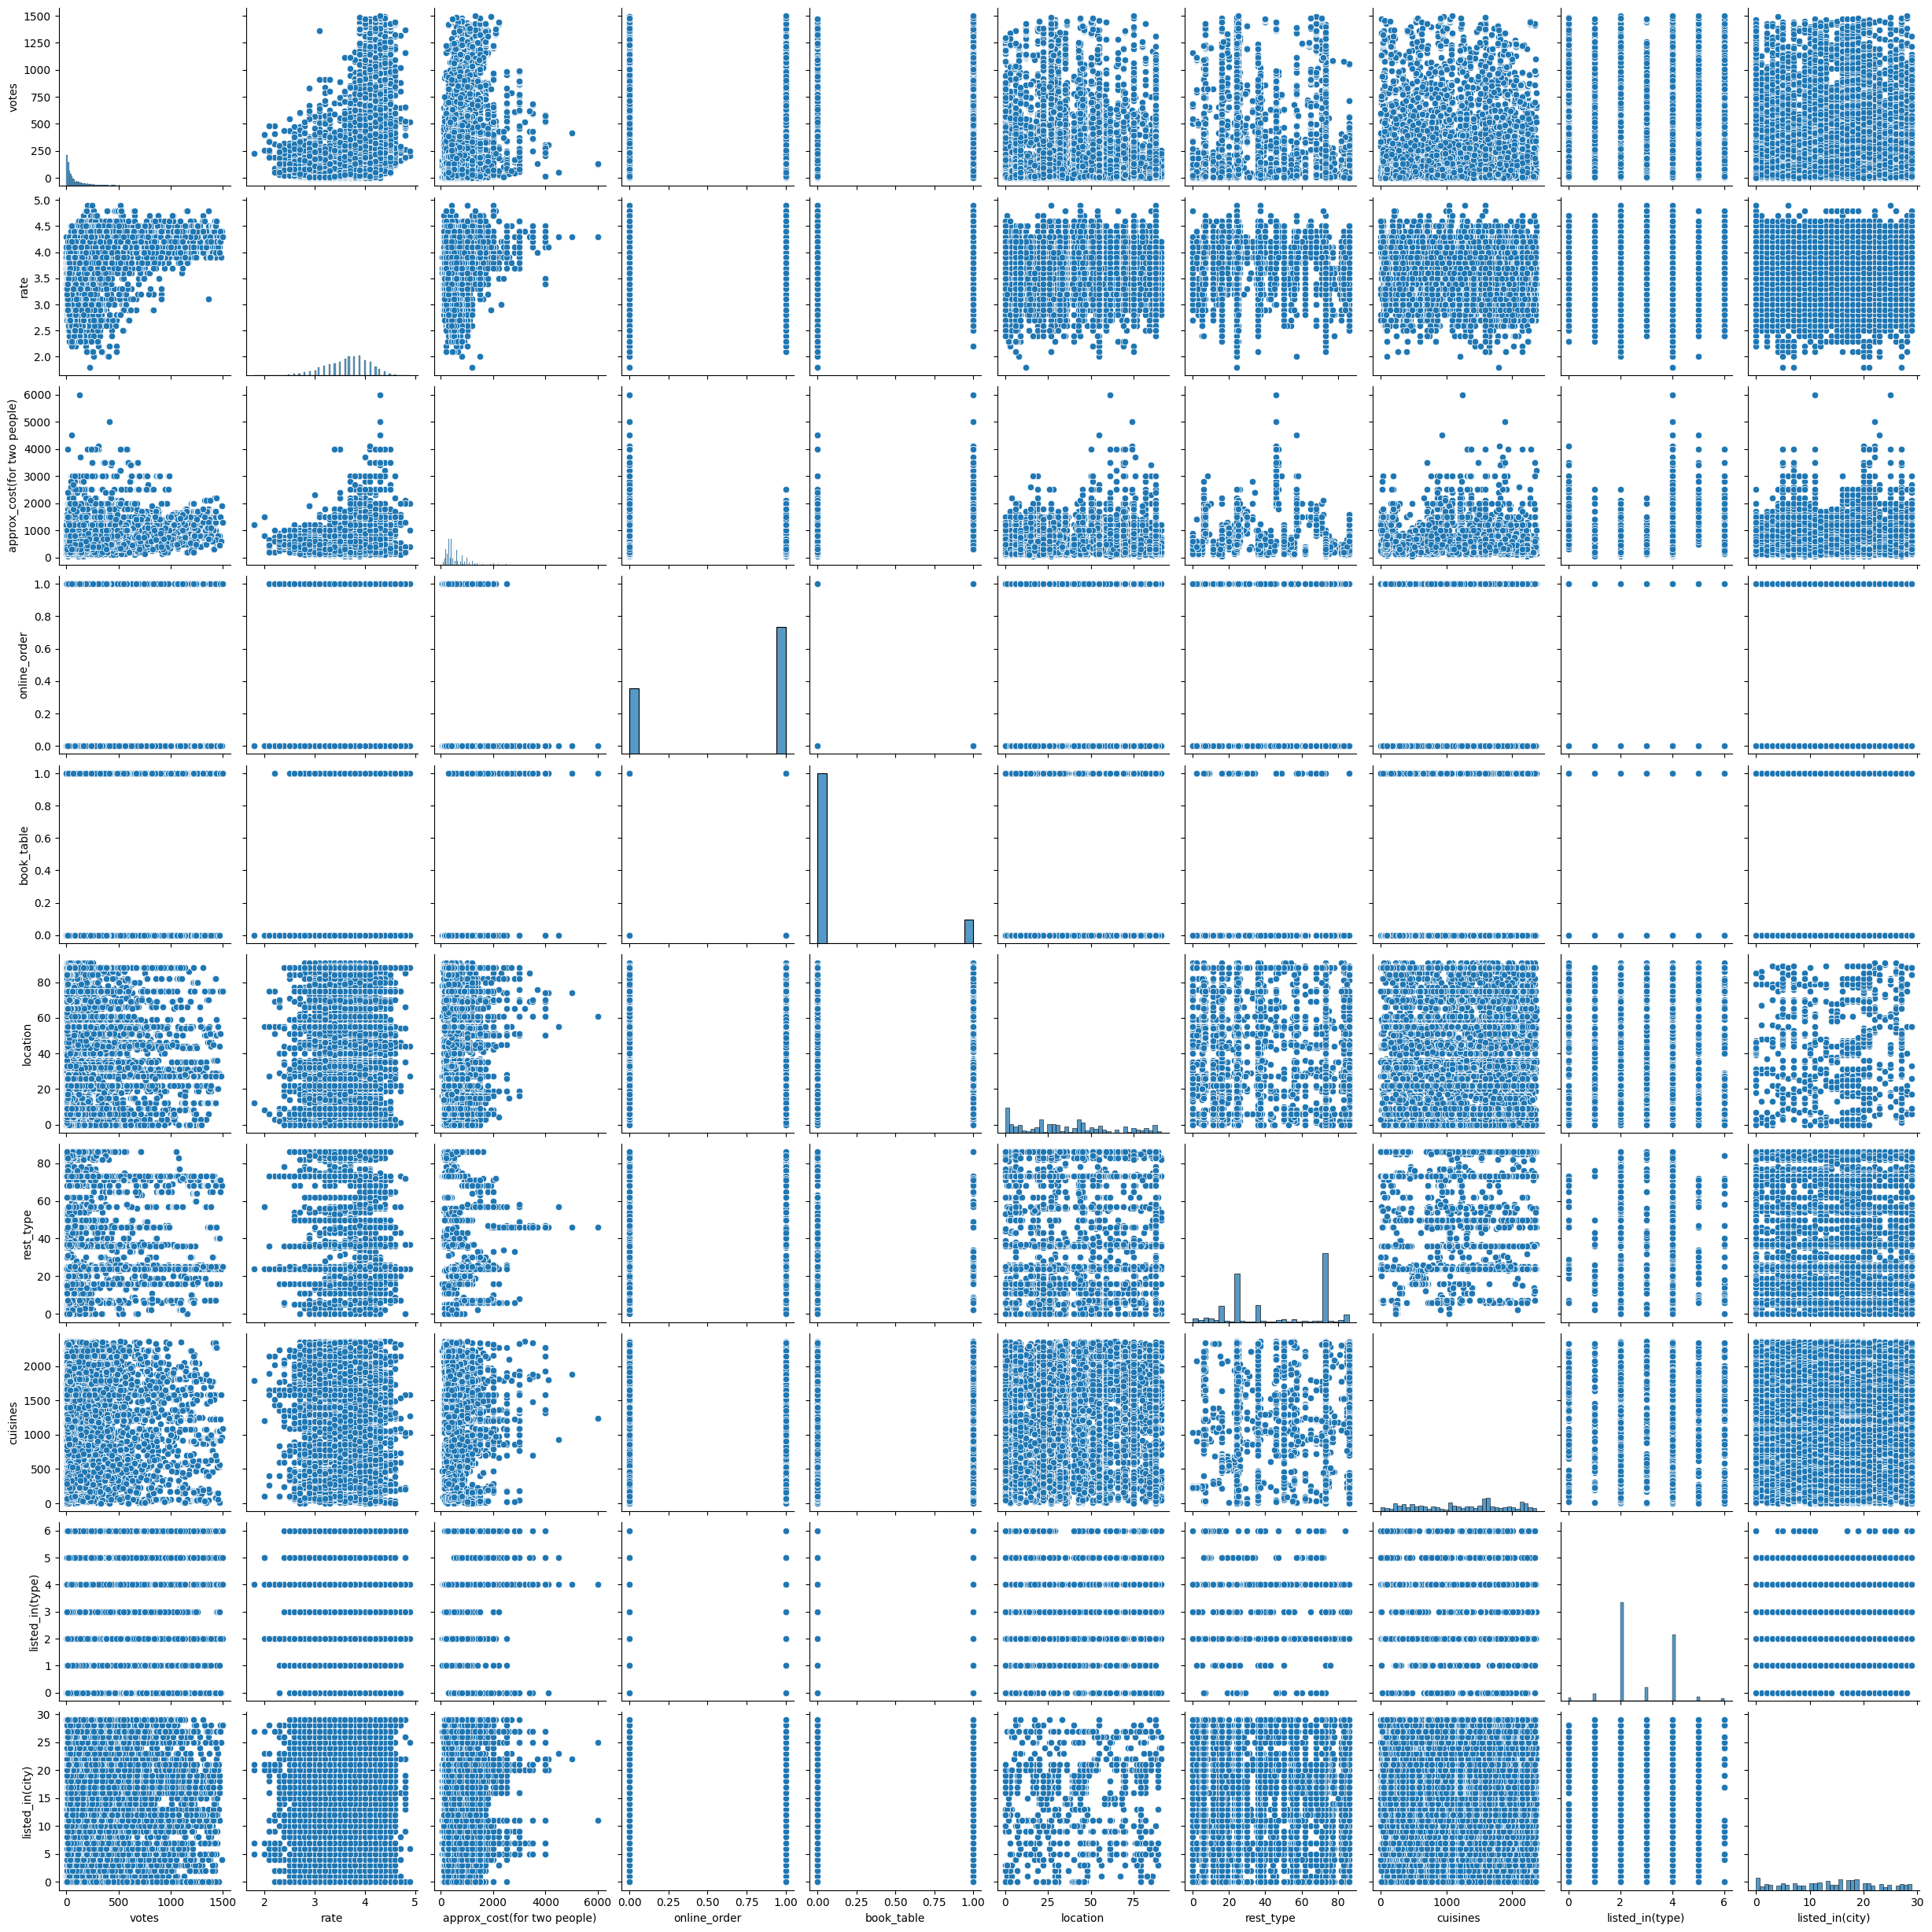

In [303]:
sns.pairplot(df_zomato_new2)
plt.show()

In [304]:
# Votes,book_table,rest_type and rate has moderate correlation with target column approx_cost(for two people)

### Spliting Features and Target columns

In [305]:
X = df_zomato_new2.drop(['approx_cost(for two people)'],axis=1)
y = df_zomato_new2['approx_cost(for two people)']

In [306]:
y.skew()

2.8085779683896184

In [307]:
y_norm = np.log(y)

In [308]:
y_norm.skew()

0.24772938546481138

In [309]:
X.skew()

votes              2.330922
rate              -0.413436
online_order      -0.673631
book_table         2.321539
location           0.389684
rest_type          0.010029
cuisines          -0.085650
listed_in(type)    0.282065
listed_in(city)   -0.062535
dtype: float64

In [310]:
X_norm = X.copy()

In [311]:
X_norm[['votes']] = np.sqrt(X_norm[['votes']])

In [312]:
X_norm.skew()

votes              1.256622
rate              -0.413436
online_order      -0.673631
book_table         2.321539
location           0.389684
rest_type          0.010029
cuisines          -0.085650
listed_in(type)    0.282065
listed_in(city)   -0.062535
dtype: float64

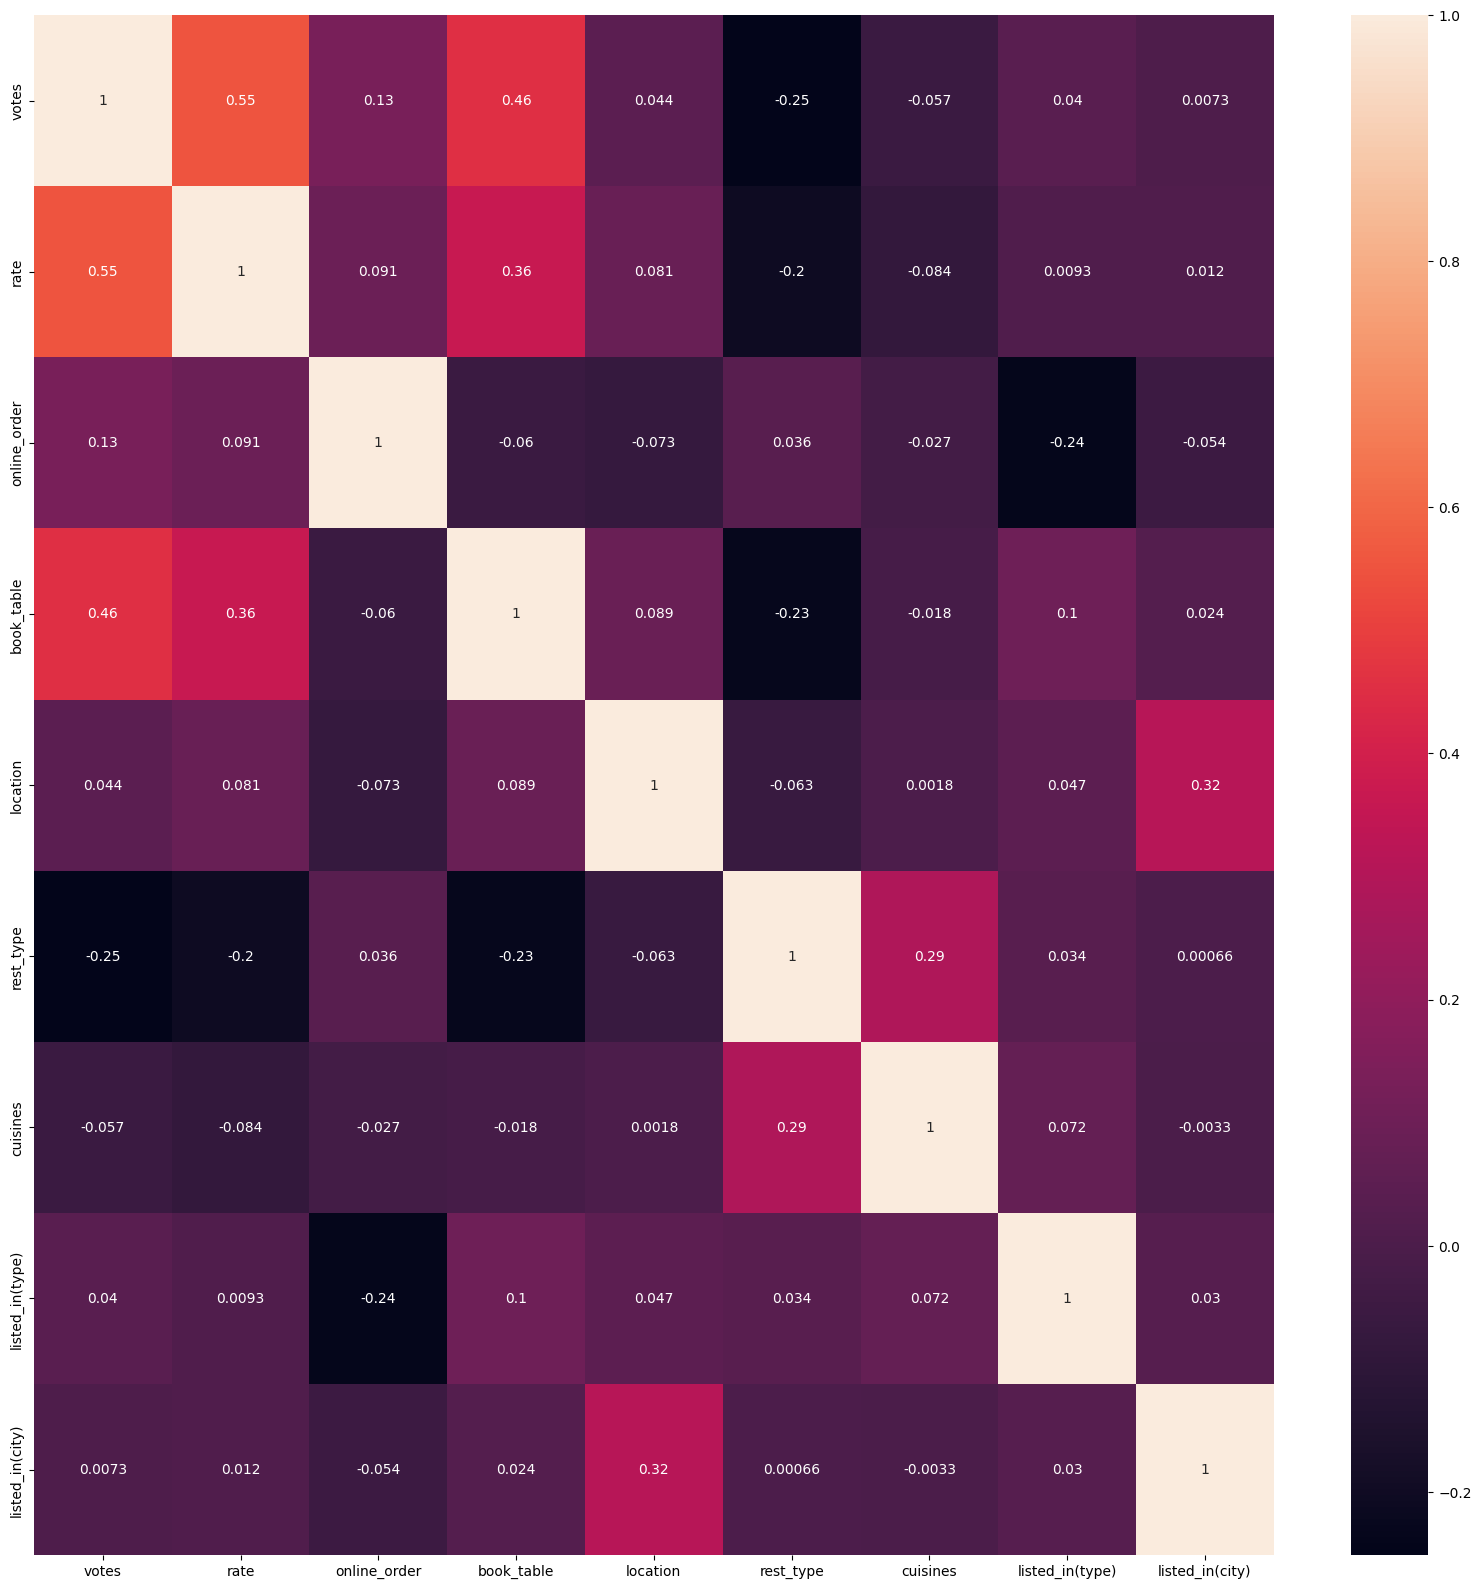

In [313]:
sns.heatmap(X_norm.corr(),annot=True)
plt.show()

In [314]:
# There is Multicolinearity present between the features but we need to check with VIF

# Train and Test Split

In [315]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y_norm,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31136, 9)
(7785, 9)
(31136,)
(7785,)


# Data Preprocessing

In [316]:
X_train.head()

,votes,rate,online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
19111,7.549834,3.7,1,0,24,36,866,2,15
31239,24.879711,4.4,0,1,55,25,884,4,23
30596,4.898979,3.2,1,0,6,24,402,2,23
1802,6.928203,3.7,0,0,29,24,1832,4,2
38851,2.236068,3.2,0,0,26,73,1660,4,29


In [317]:
X_train.isna().sum()

votes              0
rate               0
online_order       0
book_table         0
location           0
rest_type          0
cuisines           0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [318]:
scaler = MinMaxScaler()

col = ['votes','rate','location','cuisines','listed_in(city)','rest_type','listed_in(type)']

X_train[col] = scaler.fit_transform(X_train[col])

X_train.head(2)

,votes,rate,online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
19111,0.195001,0.612903,1,0,0.263736,0.418605,0.366019,0.333333,0.517241
31239,0.642606,0.838710,0,1,0.604396,0.290698,0.373626,0.666667,0.793103


# building base model

In [319]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.461
Model:                                     OLS   Adj. R-squared:                  0.461
Method:                          Least Squares   F-statistic:                     2958.
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                 23:11:24   Log-Likelihood:                -20517.
No. Observations:                        31136   AIC:                         4.105e+04
Df Residuals:                            31126   BIC:                         4.114e+04
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.1730      0.017    355.318      0.000       6.139       6.207
votes               0.7834      0.016     48.780      0.000       0.752       0.815
rate               -0.1608      0.024     -6.729      0.000      -0.208      -0.114
online_order       -0.0892      0.006    -15.132      0.000      -0.101      -0.078
book_table          0.6489      0.009     68.594      0.000       0.630       0.667
location            0.1395      0.010     14.554      0.000       0.121       0.158
rest_type          -0.6537      0.010    -68.689      0.000      -0.672      -0.635
cuisines           -0.0265      0.010     -2.710      0.007      -0.046      -0.007
listed_in(type)     0.2501      0.015     17.196      0.000       0.222       0.279
listed_in(city)     0.0176      0.010      1.801      0.072      -0.002       0.037
==============================================================================
Omnibus:                      756.463   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1660.002
Skew:                          -0.108   Prob(JB):                         0.00
Kurtosis:                       4.110   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
# Checking Multicolinearity and performing feature selection using VIF and rebuidling the model 

In [321]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,rate,17.711050
7,listed_in(type),7.113577
5,rest_type,4.676394
6,cuisines,4.589431
8,listed_in(city),4.302257
2,online_order,3.172690
4,location,3.121910
0,votes,1.983405
3,book_table,1.504999


In [322]:
vif = pd.DataFrame()
X_new = X.drop('rate',axis=1)
vif['Feature'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
6,listed_in(type),5.008035
4,rest_type,4.384029
5,cuisines,4.322993
7,listed_in(city),3.964949
3,location,2.985250
1,online_order,2.517597
0,votes,1.839459
2,book_table,1.488266


In [323]:
X_train_vif = X_train.drop(['rate'],axis=1)
X_train_sm = sm.add_constant(X_train_vif)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.460
Model:                                     OLS   Adj. R-squared:                  0.460
Method:                          Least Squares   F-statistic:                     3317.
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                 23:11:25   Log-Likelihood:                -20540.
No. Observations:                        31136   AIC:                         4.110e+04
Df Residuals:                            31127   BIC:                         4.117e+04
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0892      0.012    502.635      0.000       6.065       6.113
votes               0.7353      0.014     51.095      0.000       0.707       0.763
online_order       -0.0910      0.006    -15.436      0.000      -0.103      -0.079
book_table          0.6398      0.009     68.286      0.000       0.621       0.658
location            0.1356      0.010     14.162      0.000       0.117       0.154
rest_type          -0.6509      0.010    -68.413      0.000      -0.670      -0.632
cuisines           -0.0231      0.010     -2.367      0.018      -0.042      -0.004
listed_in(type)     0.2518      0.015     17.306      0.000       0.223       0.280
listed_in(city)     0.0183      0.010      1.872      0.061      -0.001       0.037
==============================================================================
Omnibus:                      756.771   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1612.064
Skew:                          -0.126   Prob(JB):                         0.00
Kurtosis:                       4.086   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
vif = pd.DataFrame()
X_new = X_new.drop('listed_in(city)',axis=1)
vif['Feature'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
6,listed_in(type),4.715841
4,rest_type,4.309894
5,cuisines,4.294820
3,location,2.501586
1,online_order,2.475051
0,votes,1.835164
2,book_table,1.488177


In [325]:
X_train_vif = X_train_vif.drop(['listed_in(city)'],axis=1)
X_train_sm = sm.add_constant(X_train_vif)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.460
Model:                                     OLS   Adj. R-squared:                  0.460
Method:                          Least Squares   F-statistic:                     3790.
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                 23:11:25   Log-Likelihood:                -20542.
No. Observations:                        31136   AIC:                         4.110e+04
Df Residuals:                            31128   BIC:                         4.117e+04
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0960      0.012    527.354      0.000       6.073       6.119
votes               0.7355      0.014     51.113      0.000       0.707       0.764
online_order       -0.0914      0.006    -15.503      0.000      -0.103      -0.080
book_table          0.6397      0.009     68.274      0.000       0.621       0.658
location            0.1412      0.009     15.502      0.000       0.123       0.159
rest_type          -0.6505      0.010    -68.385      0.000      -0.669      -0.632
cuisines           -0.0234      0.010     -2.398      0.017      -0.043      -0.004
listed_in(type)     0.2520      0.015     17.320      0.000       0.224       0.281
==============================================================================
Omnibus:                      757.731   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.945
Skew:                          -0.127   Prob(JB):                         0.00
Kurtosis:                       4.085   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
vif = pd.DataFrame()
X_new = X_new.drop('cuisines',axis=1)
vif['Feature'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
5,listed_in(type),4.277969
4,rest_type,3.550468
3,location,2.465193
1,online_order,2.427658
0,votes,1.834306
2,book_table,1.482493


In [327]:
X_train_vif = X_train_vif.drop(['cuisines'],axis=1)
X_train_sm = sm.add_constant(X_train_vif)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.460
Model:                                     OLS   Adj. R-squared:                  0.460
Method:                          Least Squares   F-statistic:                     4420.
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                                 23:11:25   Log-Likelihood:                -20545.
No. Observations:                        31136   AIC:                         4.110e+04
Df Residuals:                            31129   BIC:                         4.116e+04
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0883      0.011    548.068      0.000       6.067       6.110
votes               0.7356      0.014     51.112      0.000       0.707       0.764
online_order       -0.0910      0.006    -15.453      0.000      -0.103      -0.079
book_table          0.6387      0.009     68.232      0.000       0.620       0.657
location            0.1409      0.009     15.475      0.000       0.123       0.159
rest_type          -0.6570      0.009    -72.095      0.000      -0.675      -0.639
listed_in(type)     0.2502      0.015     17.217      0.000       0.222       0.279
==============================================================================
Omnibus:                      755.358   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1604.794
Skew:                          -0.127   Prob(JB):                         0.00
Kurtosis:                       4.083   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
# We can see that there is little multicolinearity is present (condition number is 9.68)
# Durbin watson number is 2.011 which is there is no Autocorrelation
# Prob(Omnibus): is close to 0 mean there is homoskedasticity
# Prob (F-statistic) is close 0 mean overall model is significant
# Jarque-Bera (JB) is close 0 mean data is not normal
# All the features are significant

In [329]:
signi_list = X_train_vif.columns.to_list()
print(signi_list)

['votes', 'online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)']


In [330]:
y_pred_train = model.predict(X_train_sm)
r2_score(y_train,y_pred_train)

0.46005339992664784

In [331]:
# We can see that we getting train score as 46.0%
# let prepare data for test and compare the result.

In [332]:
X_test[col] = scaler.transform(X_test[col])
X_test_sm = sm.add_constant(X_test[signi_list])
X_test_sm.head(2)

,const,votes,online_order,book_table,location,rest_type,listed_in(type)
2883,1.0,0.057754,0,0,0.142857,0.848837,0.666667
14710,1.0,0.370709,1,1,0.318681,0.848837,0.333333


In [333]:
X_test_sm.skew()

const              0.000000
votes              1.260894
online_order      -0.687102
book_table         2.326519
location           0.401420
rest_type          0.016774
listed_in(type)    0.293908
dtype: float64

In [334]:
X_train_signi = X_train[signi_list]
linreg = LinearRegression()
linreg.fit(X_train_signi,y_train)
y_pred = linreg.predict(X_test[signi_list])
r2_score(y_true=y_test,y_pred=y_pred)

0.45465414181355257

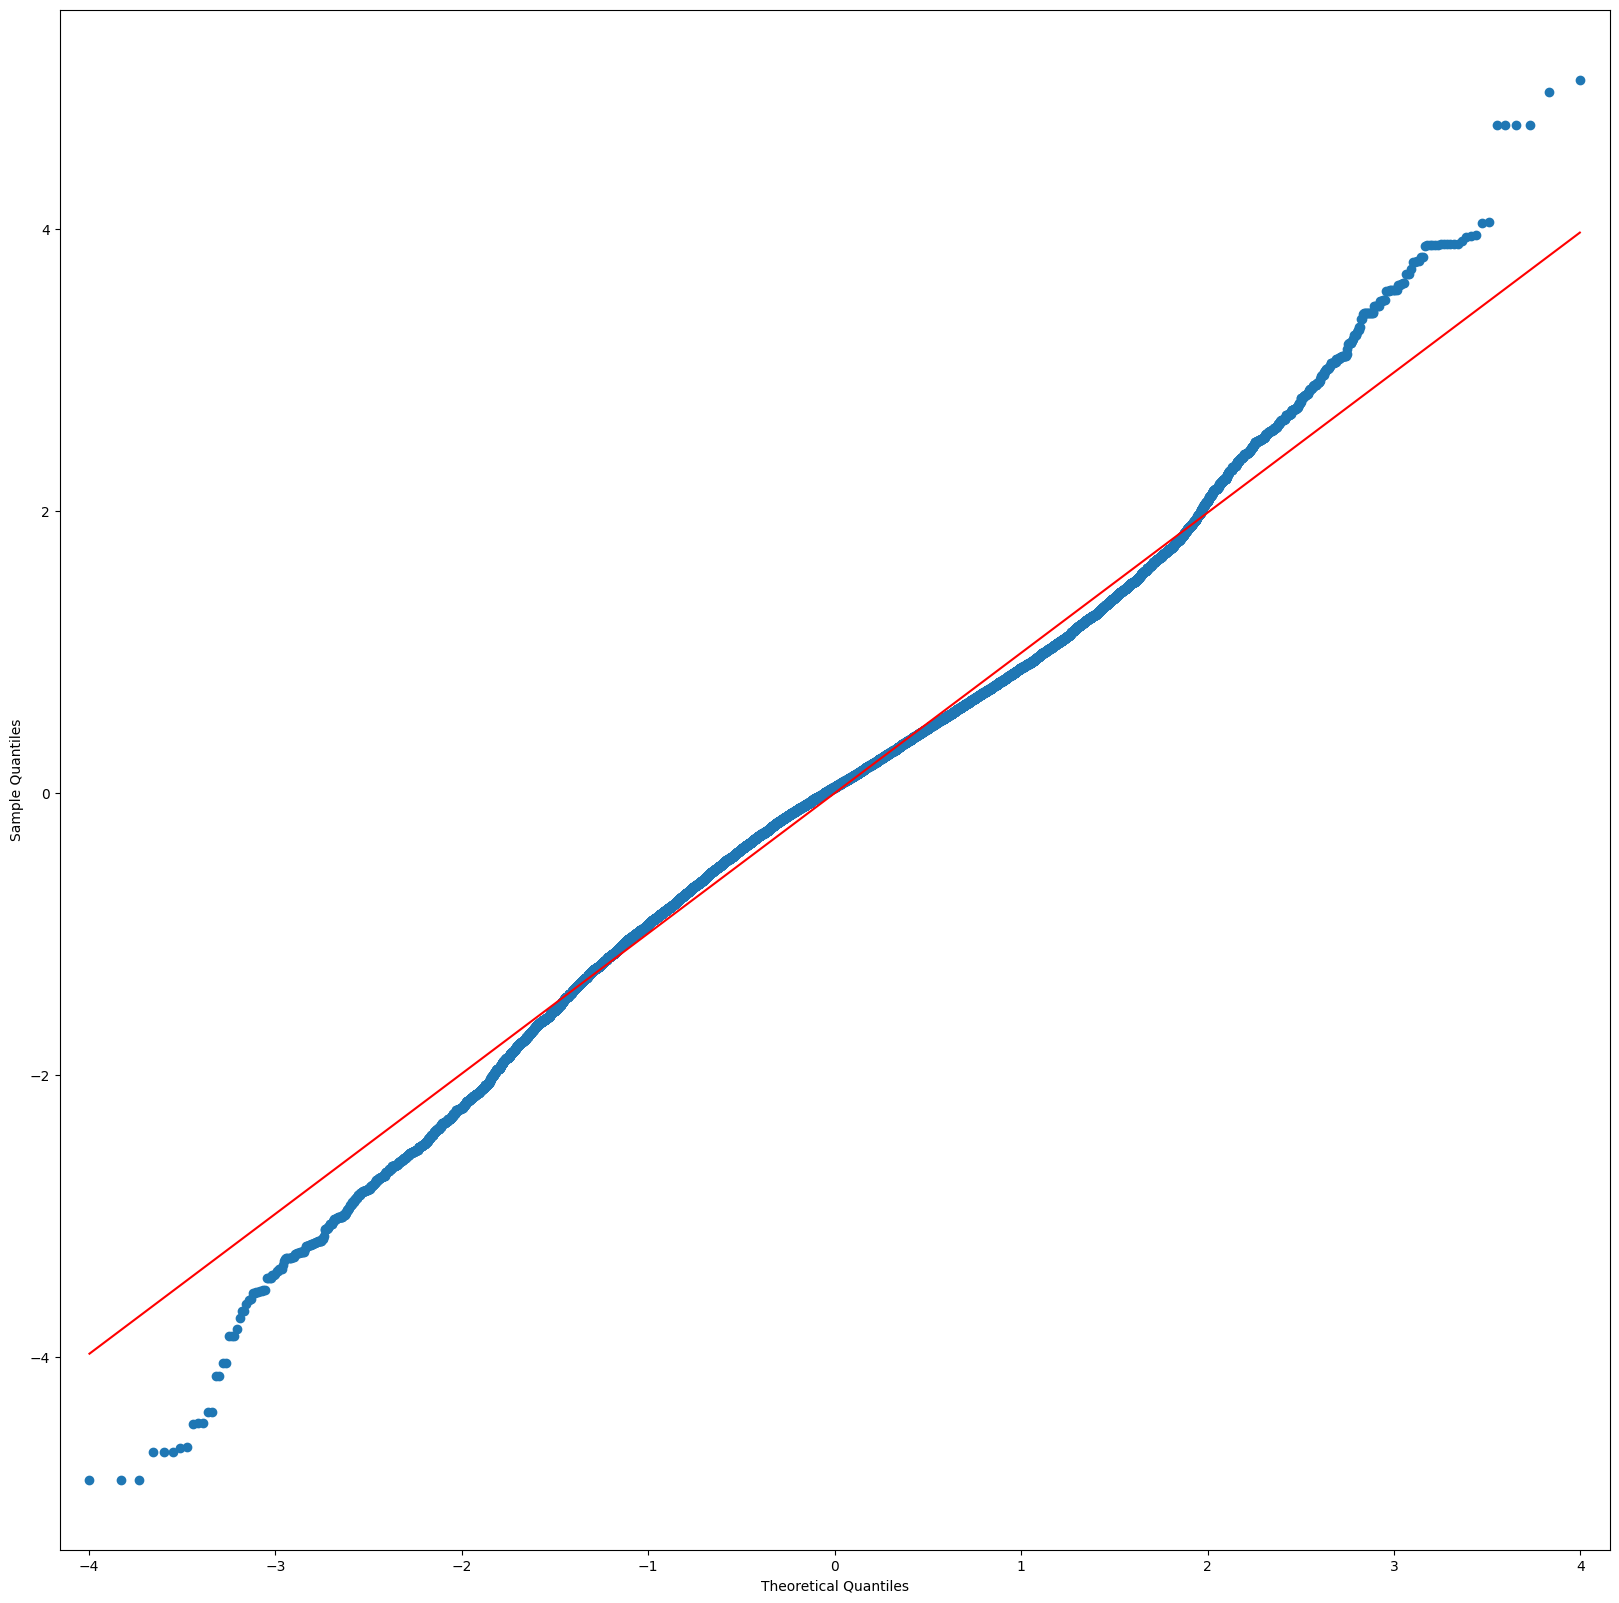

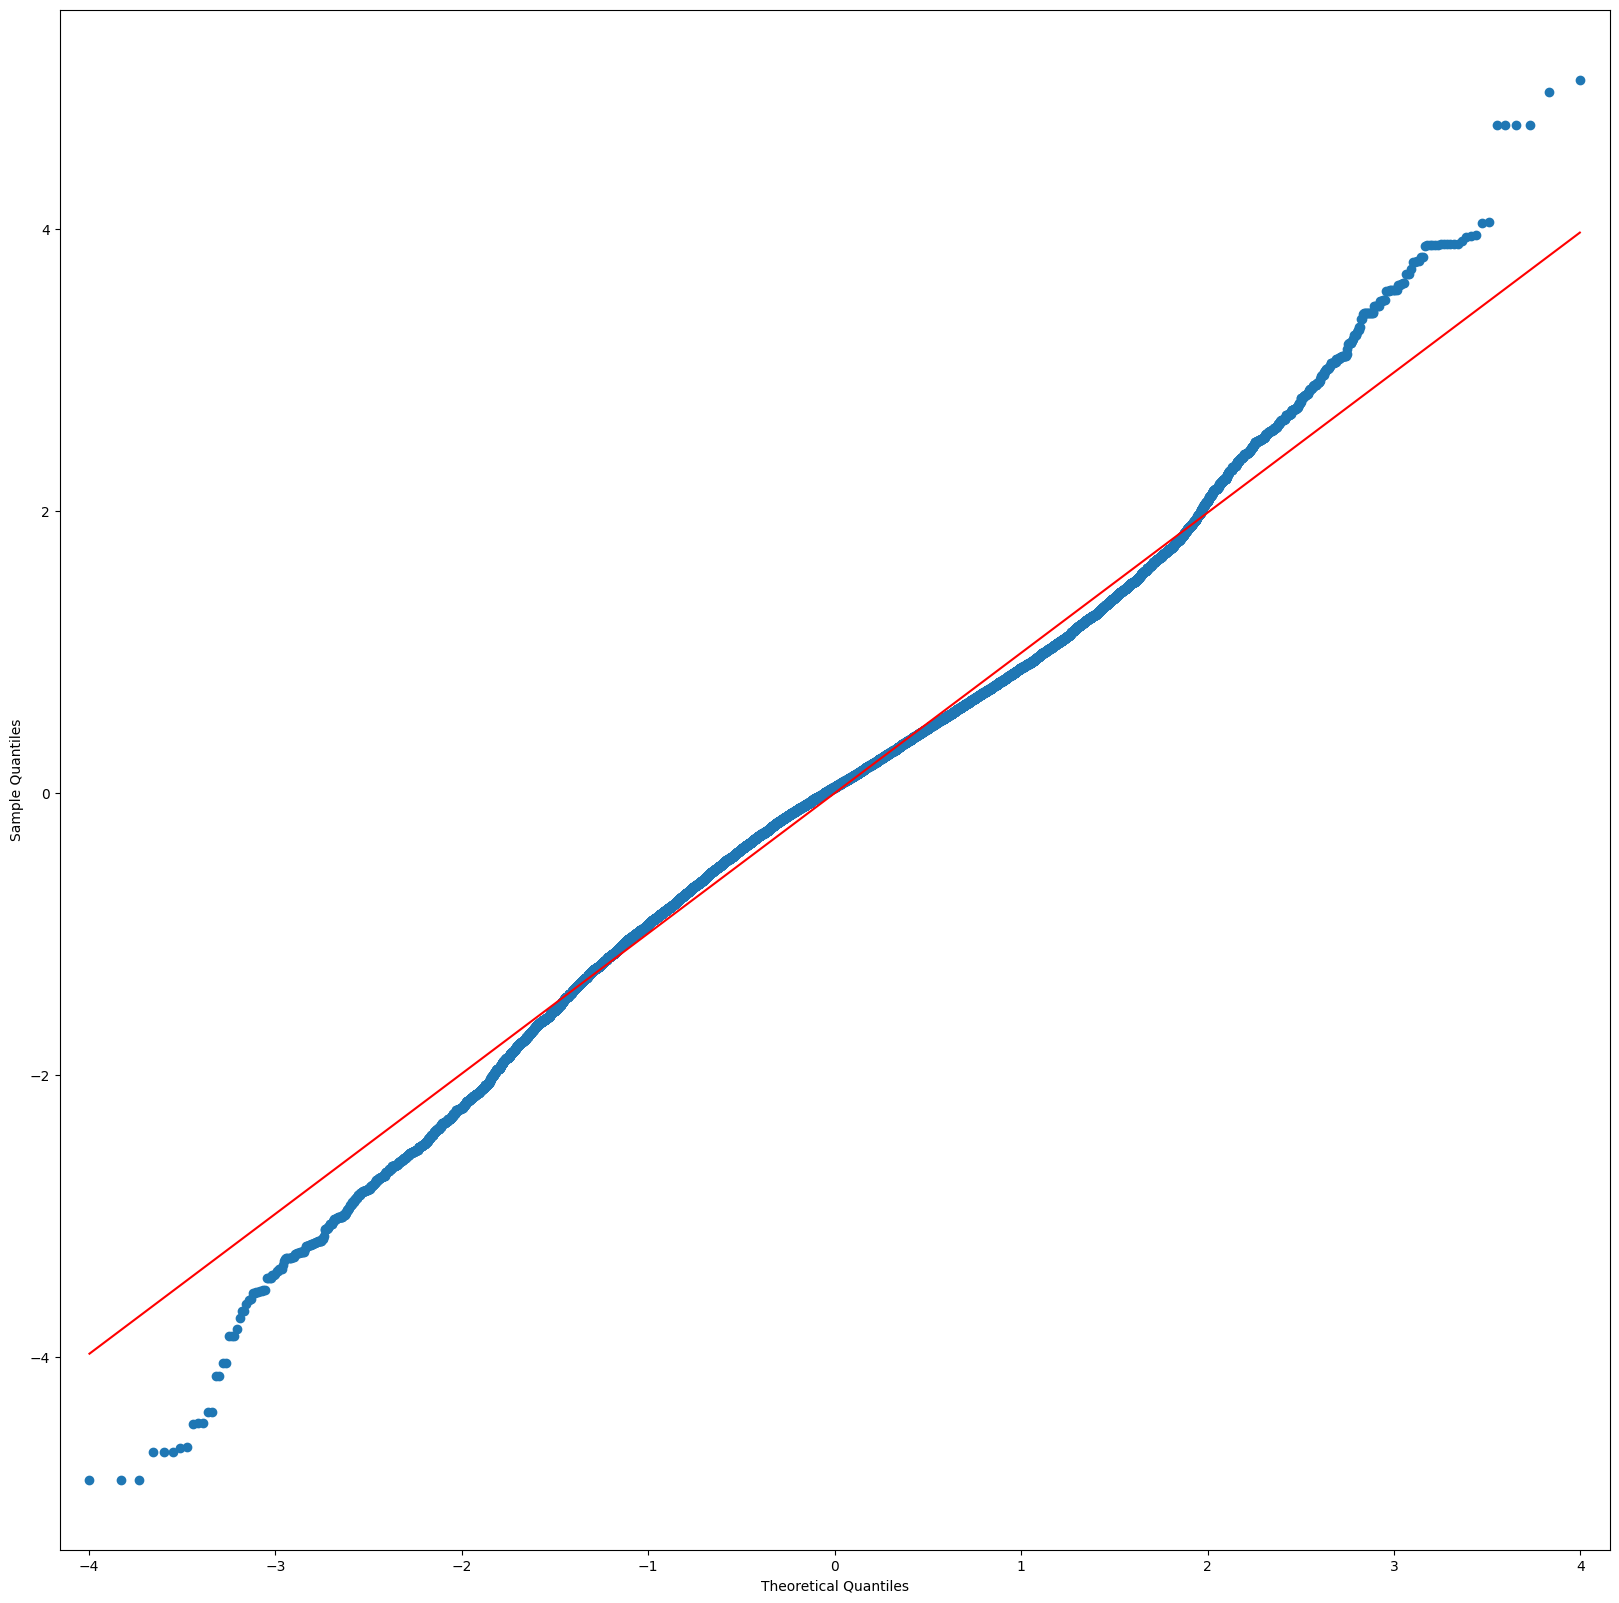

In [335]:
qqplot(model.resid,fit=True,line='r')

In [336]:
# We can see that our model is performing similarly on train and test data but the score seems to not quite high means
# our model is has high bias (it is underfitted)
# Let try to increase variance by using bagging and boosting technique and compare with base model

In [337]:
def metric_eval(model,X,y):
    y_pred = model.predict(X)
    print("r2 score : ",  r2_score(y_true=y,y_pred=y_pred))
    print("rmse score : ",  mean_squared_error(y_true=y,y_pred=y_pred,squared=False))

In [338]:
def validate_rfe(model,X,y,n):
    kf = KFold(n_splits=5)
    rfe_cv = RFECV(estimator=model,min_features_to_select=n,cv=kf,scoring='r2')
    rfe_cv.fit(X,y)
    feat_index = pd.Series(rfe_cv.ranking_,index=X.columns)
    signi_feat = feat_index[feat_index==1].index
    X_signi = X[signi_feat]
    
    val_scores = cross_val_score(estimator=model,X=X_signi,y=y,scoring='r2',cv=kf)
    print(val_scores)
    print(np.average(val_scores))
    return signi_feat   

In [339]:
# Buiding Model to incrase variance

In [340]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train,y_train)
print('Training data ')
metric_eval(dt,X_train,y_train)
print('Test data ')
metric_eval(dt,X_test,y_test)

Training data 
r2 score :  0.9998654269964323
rmse score :  0.007389745698531551
Test data 
r2 score :  0.9232948083001696
rmse score :  0.1754152451760987


In [341]:
rf = RandomForestRegressor(random_state=10)
rf.fit(X_train,y_train)
print('Training data ')
metric_eval(rf,X_train,y_train)
print('Test data ')
metric_eval(rf,X_test,y_test)

Training data 
r2 score :  0.9928357379664221
rmse score :  0.053918307534308756
Test data 
r2 score :  0.9491399501156521
rmse score :  0.14283786359053996


In [342]:
ada = AdaBoostRegressor(random_state=10)
ada.fit(X_train,y_train)
print('Training data ')
metric_eval(ada,X_train,y_train)
print('Test data ')
metric_eval(ada,X_test,y_test)

Training data 
r2 score :  0.5324687764725782
rmse score :  0.43556786436334916
Test data 
r2 score :  0.5300600080373981
rmse score :  0.4341863416039667


In [343]:
gb = GradientBoostingRegressor(random_state=10)
gb.fit(X_train,y_train)
print('Training data ')
metric_eval(gb,X_train,y_train)
print('Test data ')
metric_eval(gb,X_test,y_test)

Training data 
r2 score :  0.7034075336677214
rmse score :  0.3469209909778
Test data 
r2 score :  0.6978074353421364
rmse score :  0.3481744050930117


In [344]:
xgb = XGBRegressor(random_state=10)
xgb.fit(X_train,y_train)
print('Training data ')
metric_eval(xgb,X_train,y_train)
print('Test data ')
metric_eval(xgb,X_test,y_test)

Training data 
r2 score :  0.8859689989415909
rmse score :  0.2151106878670044
Test data 
r2 score :  0.858405181599441
rmse score :  0.23832995741541607


In [345]:
bg = BaggingRegressor(random_state=10)
bg.fit(X_train,y_train)
print('Training data ')
metric_eval(bg,X_train,y_train)
print('Test data ')
metric_eval(bg,X_test,y_test)

Training data 
r2 score :  0.9888527962712593
rmse score :  0.0672563802486481
Test data 
r2 score :  0.9433845625460354
rmse score :  0.15070317033852024


In [346]:
# Random forest is performing better than other model with overall test score as 95% (approx).
# We have significant improve the model performance but let try to improve futher.

# Feature selection with Model validation

In [347]:
n = len(X_train.columns.to_list())
validate_rfe(rf,X_train,y_train,n)

[0.93098526 0.93647345 0.93863763 0.93490734 0.93478769]
0.9351582750646861


Index(['votes', 'rate', 'online_order', 'book_table', 'location', 'rest_type',
       'cuisines', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [348]:
n = len(X_train.columns.to_list())
validate_rfe(rf,X_train,y_train,n-1)

[0.94058594 0.94618037 0.94546786 0.94509595 0.94259115]
0.9439842532717652


Index(['votes', 'rate', 'online_order', 'book_table', 'location', 'rest_type',
       'cuisines', 'listed_in(type)'],
      dtype='object')

In [349]:
validate_rfe(rf,X_train,y_train,n-4)

[0.94916296 0.94509432 0.94664801 0.94788402 0.94663406]
0.9470846725234605


Index(['votes', 'book_table', 'location', 'rest_type', 'cuisines'], dtype='object')

In [350]:
validate_rfe(rf,X_train,y_train,n-5)

[0.94916296 0.94509432 0.94664801 0.94788402 0.94663406]
0.9470846725234605


Index(['votes', 'book_table', 'location', 'rest_type', 'cuisines'], dtype='object')

In [351]:
# we can see there is no further chnage in the model after removing 4 features so it is better
# to buiding model with 5 features

max_avg = 0
for i in range(n,0,-1):
    current_avg =  validate_rfe(rf,X_train,y_train,i)[1]
    max_avg = max(max_avg,current_avg)
print(max_avg)

param_list = [{'n_estimators':[10,25,50,100,150,200],
              'max_depth':[None,10,20,50],
              'min_samples_split':[1,2,3,4,5,10]}]

rf2 =  RandomForestRegressor(random_state=10)
kf = KFold(n_splits=5,shuffle=True)
grid = GridSearchCV(estimator=rf2,param_grid=param_list,scoring='r2',cv=kf,verbose=2)
grid.fit(X_train_signi,y_train)
print('Best Param for Random Forest ',grid.best_params_)
print('Best Score for Random Forest ',grid.best_score_)

In [352]:
# Best Param for Random Forest  {'max_depth': None, 'max_features': 3, 'min_samples_split': 1, 'n_estimators': 200}
# Best Score for Random Forest  0.9473487728893005

rf_tuned = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],min_samples_split=grid.best_params_['min_samples_split'],
                                  max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'],random_state=10)
rf_tuned.fit(X_train_signi,y_train)

print('Training data ')
metric_eval(rf_tuned,X_train_signi,y_train)
print('Test data ')
metric_eval(rf_tuned,X_test_signi,y_test)

Training data 
r2 score :  0.9918874055670606
rmse score :  0.0032920074265324673
Test data 
r2 score :  0.9576664550138229
rmse score :  0.016982223314573008

param_list = [{'n_estimators':[150,200,225,250,300,350],
              'max_depth':[None,25,50,75,100],
              'min_samples_split':[1,2,10,20]}]

rf3 =  RandomForestRegressor(random_state=10)
kf = KFold(n_splits=5,shuffle=True)
grid2 = GridSearchCV(estimator=rf3,param_grid=param_list,scoring='r2',cv=kf,verbose=2)
grid2.fit(X_train_signi,y_train)
print('Best Param for Random Forest ',grid2.best_params_)
print('Best Score for Random Forest ',grid2.best_score_)

In [353]:
# Best Param for Random Forest  {'max_depth': 50, 'min_samples_split': 1, 'n_estimators': 350}
# Best Score for Random Forest  0.9457503731699536

rf_tuned2 = RandomForestRegressor(n_estimators=grid2.best_params_['n_estimators'],min_samples_split=grid2.best_params_['min_samples_split'],
                                  max_depth=grid2.best_params_['max_depth'],random_state=10)
rf_tuned2.fit(X_train_signi,y_train)

print('Training data ')
metric_eval(rf_tuned2,X_train_signi,y_train)
print('Test data ')
metric_eval(rf_tuned2,X_test_signi,y_test)

Training data 
r2 score :  0.9917831938399055
rmse score :  0.0033342954741554572
Test data 
r2 score :  0.9568662257053112
rmse score :  0.017303237602992478

In [354]:
# using GridsearchCV we have not got may significant boast also it was very time consuming

# Rebulding model with significant Variable 

In [355]:
X_train_signi = X_train[['votes', 'book_table', 'location', 'rest_type', 'cuisines']]
X_test_signi = X_test[['votes', 'book_table', 'location', 'rest_type', 'cuisines']]

In [356]:
rf2 = RandomForestRegressor(random_state=10)
rf2.fit(X_train_signi,y_train)
print('Training data ')
metric_eval(rf2,X_train_signi,y_train)
print('Test data ')
metric_eval(rf2,X_test_signi,y_test)

Training data 
r2 score :  0.9914916599601651
rmse score :  0.05875880296345239
Test data 
r2 score :  0.9558982269028171
rmse score :  0.1330095977980414


In [357]:
#df_zomato_new2.to_csv('df_zomato_new2.csv',index=False)

# Feature Importances

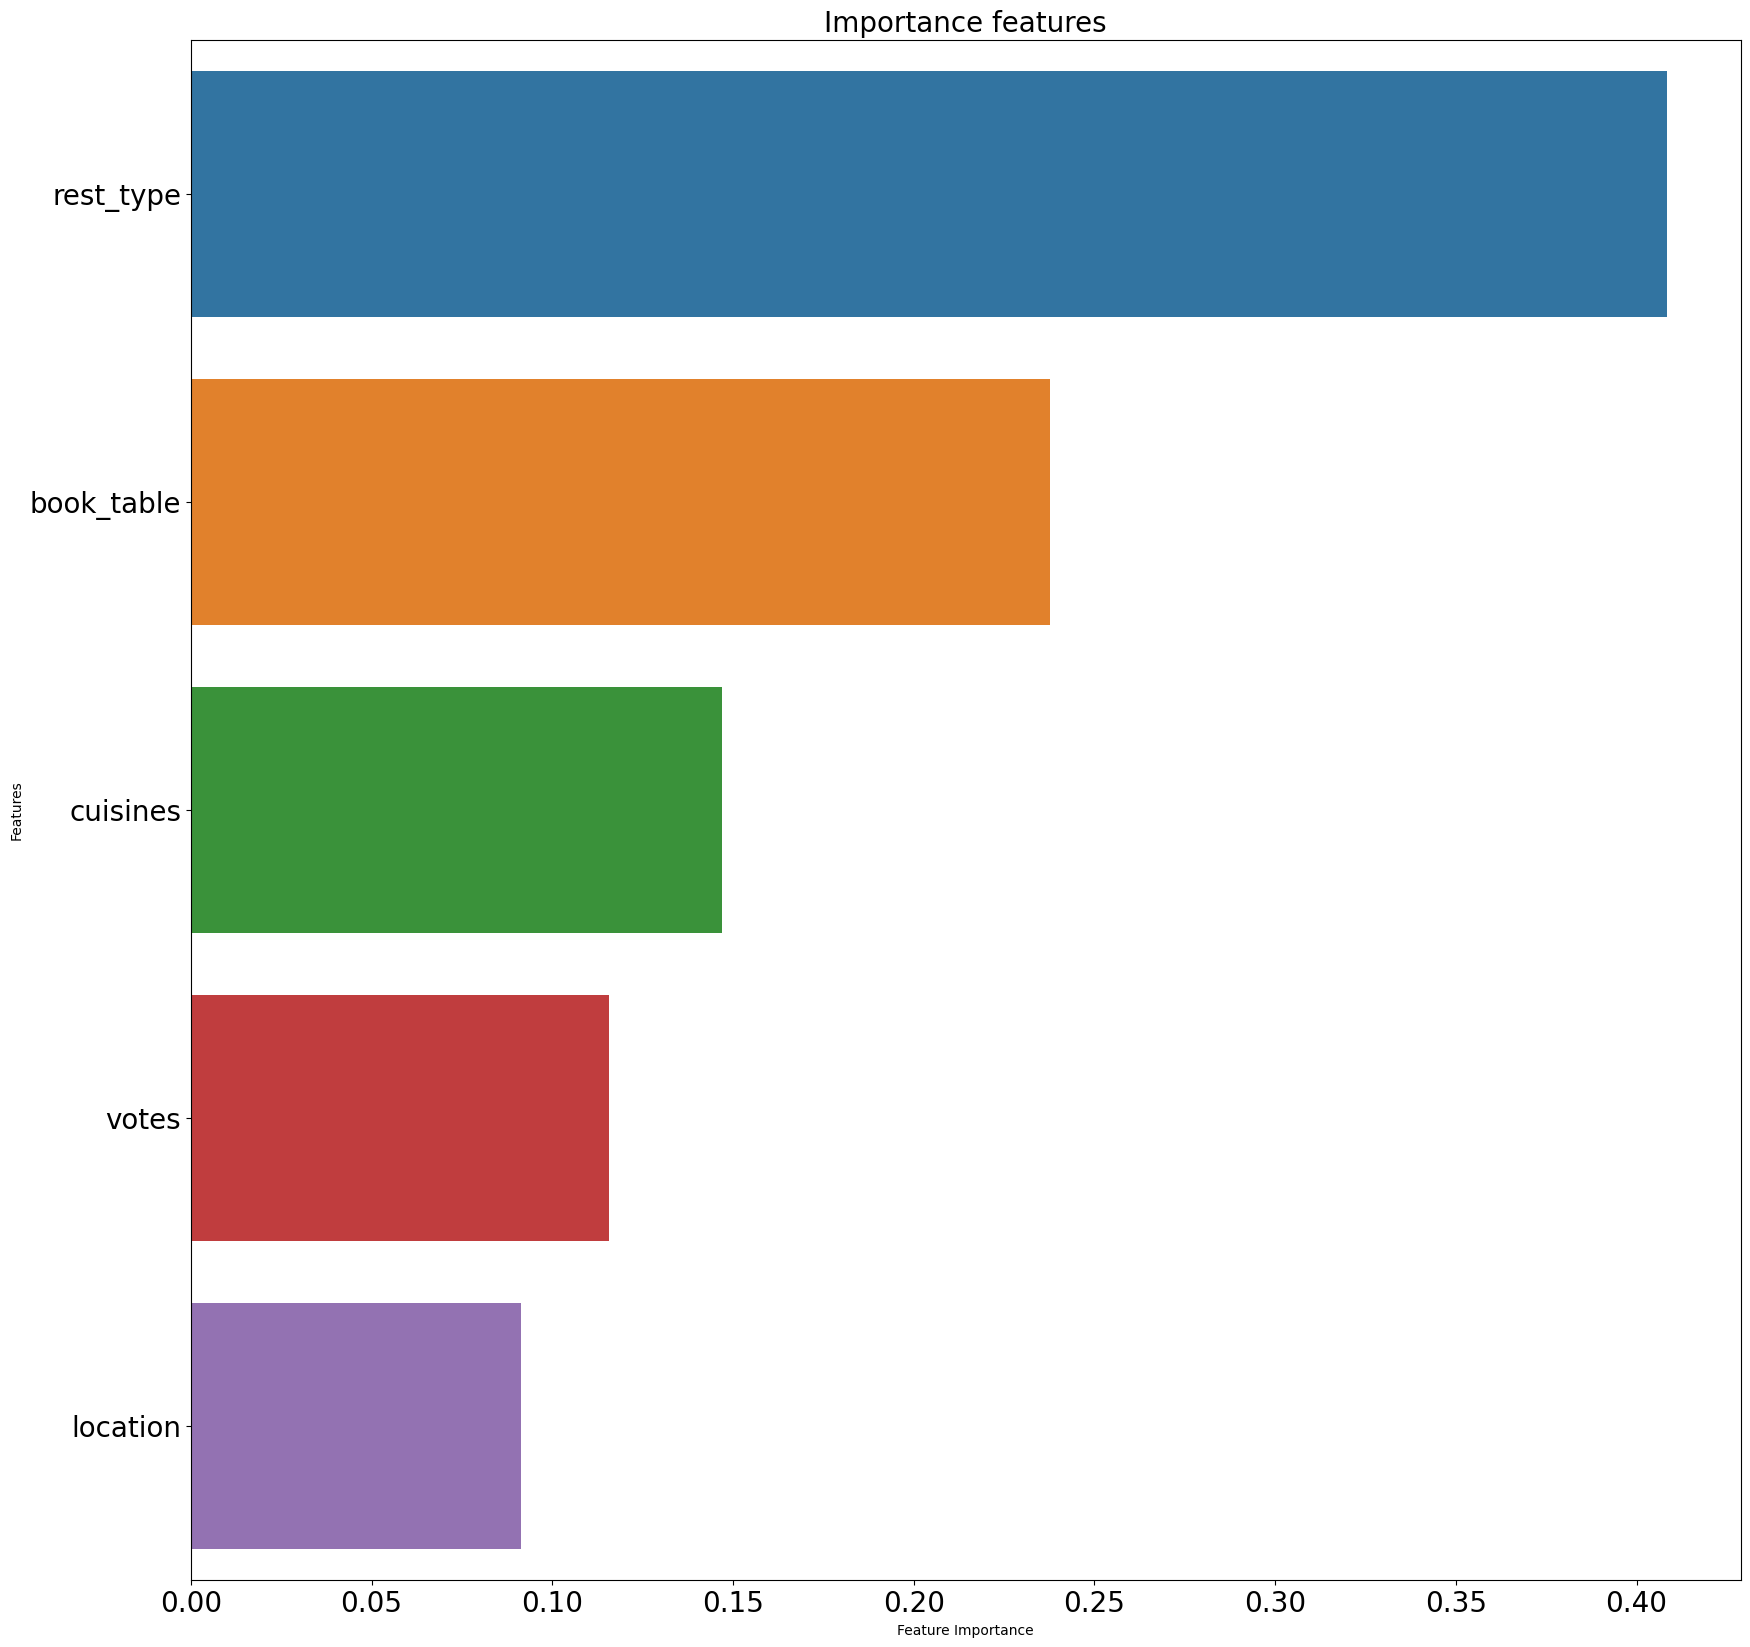

In [358]:
df_feature_importance = pd.DataFrame({'Features':X_train_signi.columns,
                                      'Feature Importance':rf2.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(by='Feature Importance',ascending=False)
sns.barplot(data=df_feature_importance,x='Feature Importance',y='Features')
plt.title('Importance features',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [359]:
# We can see rest_type is impacting the target variable the most followed by book_table,cuisines,votes and location

In [360]:
# Let try to improve the performance further by using stacking

# Stacking 

In [361]:
base_learners = [('Random Forest',RandomForestRegressor(random_state=10)),
                ('Decision Tree',DecisionTreeRegressor(random_state=3)),
                ('Gradient Boosting',GradientBoostingRegressor(random_state=3)),
                ('XGB Boosting',XGBRegressor(random_state=1))]

kf = KFold(n_splits=5)
stack_r = StackingRegressor(estimators=base_learners,final_estimator=LinearRegression()
                              ,cv=kf)
stack_r.fit(X_train_signi,y_train)
print('Training data ')
metric_eval(stack_r,X_train_signi,y_train)
print('Test data ')
metric_eval(stack_r,X_test_signi,y_test)

Training data 
r2 score :  0.9935199365823884
rmse score :  0.05127907099689056
Test data 
r2 score :  0.9578527686157867
rmse score :  0.13002877788144476


##### Let try to add some feature.

In [362]:
X_train_signi2 = X_train.drop(['listed_in(city)','listed_in(type)'],axis=1)
X_test_signi2 = X_test.drop(['listed_in(city)','listed_in(type)'],axis=1)

base_learners = [('Random Forest',RandomForestRegressor(random_state=10)),
                ('Decision Tree',DecisionTreeRegressor(random_state=3)),
                ('Gradient Boosting',GradientBoostingRegressor(random_state=3)),
                ('XGB Boosting',XGBRegressor(random_state=1)),
                ('KNN',KNeighborsRegressor(n_neighbors=5))]


kf = KFold(n_splits=5)
stack_r = StackingRegressor(estimators=base_learners,final_estimator=LinearRegression()
                              ,cv=kf)
stack_r.fit(X_train_signi2,y_train)
print('Training data ')
metric_eval(stack_r,X_train_signi2,y_train)
print('Test data ')
metric_eval(stack_r,X_test_signi2,y_test)   

Training data 
r2 score :  0.9960527202151885
rmse score :  0.04002206341702844
Test data 
r2 score :  0.9645915783537342
rmse score :  0.11918133314997938


In [363]:
# We have improve the overall model performance by using stacking although not very significantly but we are getting less
# difference between test and train score which is around 3.1 %.